# HOMEWORK#1
## 1. Data Loading and Preparation:
• Consider the last three digits of your student ID number and store them in the variable
studID.

• Load the contents of the file output.csv into a pandas DataFrame.

In [2]:
import pandas as pd 
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import matplotlib.patches as mpatches 
import matplotlib.colors as mcolors
import matplotlib.lines as mlines 
import numpy as np 


studID= 144
df = pd.read_csv("output.csv")

print('--- FIRST 5 LINES OF DF ---')
print(df.head())


--- FIRST 5 LINES OF DF ---
  symbol           company_name                  sector  \
0   AAPL             Apple Inc.              Technology   
1   MSFT  Microsoft Corporation              Technology   
2   NVDA     NVIDIA Corporation              Technology   
3   AMZN       Amazon.com, Inc.       Consumer Cyclical   
4  GOOGL          Alphabet Inc.  Communication Services   

                         industry     market_cap  enterprise_value  \
0            Consumer Electronics  3278873821184     3321891913728   
1       Software - Infrastructure  2908619014144     2939973795840   
2                  Semiconductors  2892136185856     2838940090368   
3                 Internet Retail  2079374704640     2133579530240   
4  Internet Content & Information  1996906430464     1931518148608   

   current_price  previous_close  fifty_two_week_high  fifty_two_week_low  \
0     218.270004      214.100006           260.100006          164.080002   
1     391.260010      386.839996          

• Sort the DataFrame by the column "market_cap".

In [3]:
sorted_df= df.sort_values(by='market_cap', ascending=False) 
print('--- DataFrame Sorted by Market_cap ---')
print(sorted_df)

--- DataFrame Sorted by Market_cap ---
    symbol             company_name                  sector  \
0     AAPL               Apple Inc.              Technology   
1     MSFT    Microsoft Corporation              Technology   
2     NVDA       NVIDIA Corporation              Technology   
3     AMZN         Amazon.com, Inc.       Consumer Cyclical   
4    GOOGL            Alphabet Inc.  Communication Services   
..     ...                      ...                     ...   
995   TREX       Trex Company, Inc.             Industrials   
996   DINO  HF Sinclair Corporation                  Energy   
997    VFC         V.F. Corporation       Consumer Cyclical   
998   BPOP            Popular, Inc.      Financial Services   
999    BWA          BorgWarner Inc.       Consumer Cyclical   

                           industry     market_cap  enterprise_value  \
0              Consumer Electronics  3278873821184     3321891913728   
1         Software - Infrastructure  2908619014144     29399

• Extract the company corresponding to the position indicated by studID.

• From the selected company, note its sector and industry details.

In [4]:
my_company = sorted_df.iloc[studID] 
my_company_sector = my_company['sector'] 
my_company_industry = my_company['industry'] 

#print(my_company)
print(f'The name of my company is: {my_company['company_name']}')
print(f'The sector of my company is: {my_company_sector}')
print(f'The industry of my company is: {my_company_industry}')


The name of my company is: Amphenol Corporation
The sector of my company is: Technology
The industry of my company is: Electronic Components


## 2. Stock Data Retrieval:
• Using the symbol from the selected company, retrieve the daily stock data for the last 3
months via the yfinance library.
• This data will be used to plot the daily trend of the company

In [5]:
my_company_symbol = my_company['symbol'] 
print(f'The symbol of my company is: {my_company_symbol}')

end_date = datetime.today()
start_date = end_date - timedelta(days=90)

stock_data = yf.download(my_company_symbol, start=start_date, end=end_date, interval='1d')

print('--- First lines stock_data ---')
print(stock_data.head())

The symbol of my company is: APH
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['APH']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


--- First lines stock_data ---
Empty DataFrame
Columns: [(Adj Close, APH), (Close, APH), (High, APH), (Low, APH), (Open, APH), (Volume, APH)]
Index: []


## 3. Visualization – Creating Four Plots:
Note 1: Use a color (Color#1) for the selected company and a different one (Color#2) for the others.

Note 2: Filter the data by value where necessary to optimize the visualization

In [6]:
color_selected = "#FF5733"   
color_others ="#3498DB"    

red_patch = mpatches.Patch(color=color_selected , label=my_company['company_name'])
blue_patch = mpatches.Patch(color=color_others, label='Other companies')


### Plot 1: 

A line chart showing the daily trend (closing price) over the last 3 months of the
selected company’s stock data, with the selected company’s data highlighted in Color#1.

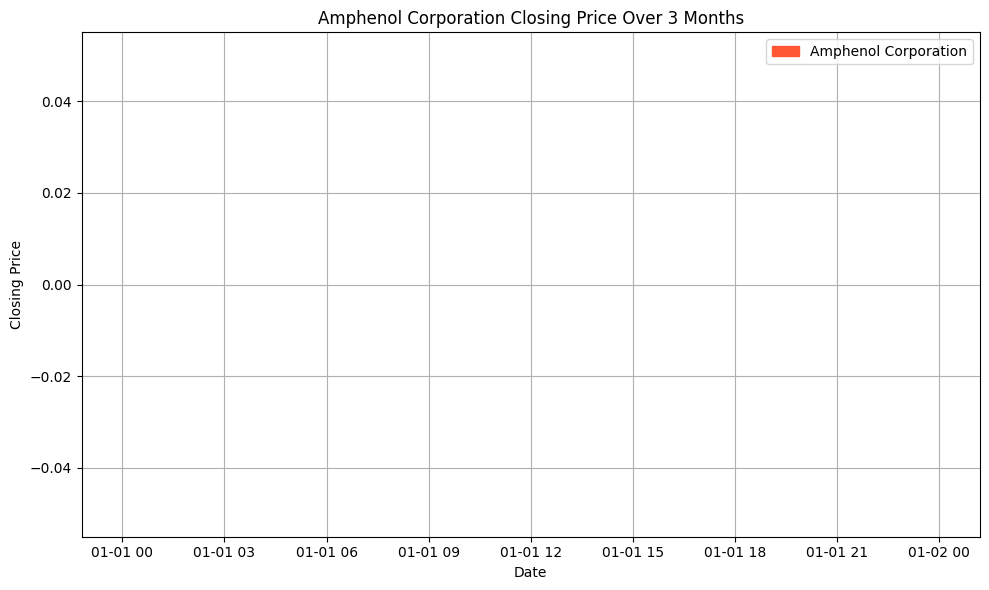

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(stock_data.index, 
         stock_data["Close"], 
         color = color_selected,
         label=f"{my_company['company_name']} Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{my_company['company_name']} Closing Price Over 3 Months")
plt.legend(handles=[red_patch], loc='upper right') 
plt.grid(True)

plt.tight_layout()
plt.show()

The chart shows the closing price of Amphenol Corporation shares over a three-month period. It is a line chart. This type of chart is ideal for visualizing the movement of a variable (in this case, the closing price) over time.

Movement:
The price starts around 72.5 and shows a rapid increase until it reaches the maximum peak of the chart, exceeding 77.5. After the peak, a significant drop in the price is observed, with several oscillations but a general downward trend until it reaches a minimum around 62.5 at the beginning of March.
During the month of March, the price shows some volatility with several peaks and valleys, but it seems to stabilize slightly around the middle of the month before rising towards the end.
In April, a new drop in the price is observed, followed by a recovery towards the middle of the month.

### Plot 2: 
A bar chart comparing the market capitalization of the top 10 companies in the same
sector as the selected company. A dashed line indicates the average market cap for that
sector. All companies are shown in Color#2, while the selected company is highlighted in
Color#1.

In [8]:
sorted_df_sector = sorted_df[sorted_df['sector'] == my_company_sector]
top_10=  sorted_df_sector.nlargest(10, 'market_cap')
my_company_2 = pd.DataFrame([my_company])
top_10_with_my_company = pd.concat([top_10, my_company_2], ignore_index=True).drop_duplicates()

colors = [color_selected if x == my_company['company_name'] else color_others for x in top_10_with_my_company['company_name']]

mean_of_sectors = sorted_df.groupby('sector')['market_cap'].agg(['mean']).reset_index()
my_sector_mean=mean_of_sectors[mean_of_sectors['sector'] == my_company_sector]["mean"].values[0]
print(my_sector_mean)

112769520934.78787


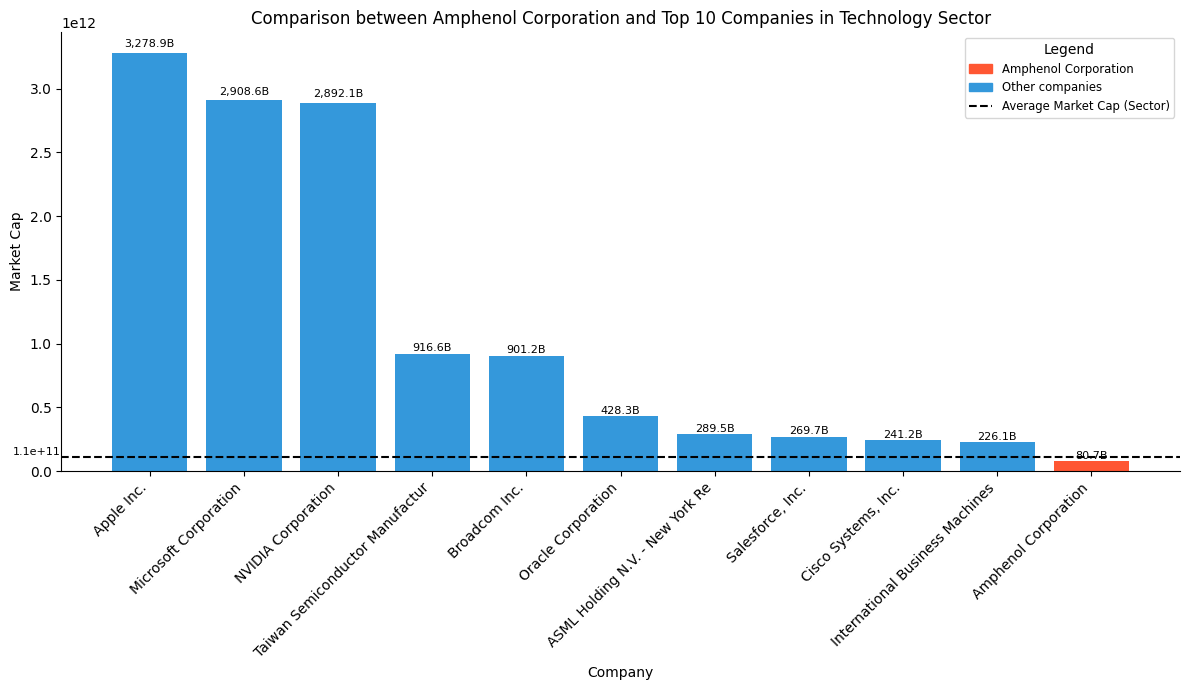

In [9]:
plt.figure(figsize=(12, 7))

bars = plt.bar(top_10_with_my_company['company_name'],
               top_10_with_my_company['market_cap'],
               color=colors)

dashed_line= mlines.Line2D([], [], color='black', linestyle='--', label='Average Market Cap (Sector)')


for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    height_billion = height / 1e9
    plt.text(
        x,
        height + height * 0.01,
        f'{height_billion:,.1f}B',
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=0
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title(f"Comparison between {my_company['company_name']} and Top 10 Companies in {my_company_sector} Sector")
plt.xlabel('Company')
plt.ylabel('Market Cap')
plt.axhline(y=my_sector_mean, color="black", linestyle='--', label='Average market cap')
plt.text(-1.2,my_sector_mean-0.35e+10, f'{my_sector_mean:.1e}',ha='center', va='bottom', fontsize=8, color='black')
plt.legend(handles=[red_patch,blue_patch,dashed_line], loc='upper right', title='Legend', fontsize='small', title_fontsize='medium')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart compares the market cap of Amphenol Corporation to the top 10 companies in the technology sector.
* Amphenol Corporation is significantly smaller in terms of market cap than most of the top 10 technology companies. Its bar is significantly shorter than those of companies such as Apple, Microsoft, and NVIDIA.
* The top three companies (Apple, Microsoft, and NVIDIA) show very high market caps, far outstripping all other companies in the chart. Apple in particular stands out as the company with the highest market cap.
* There is a notable gap between the top three companies and the rest of the technology companies considered.

### Plot 3:
A similar bar chart comparing the market cap of the top 10 companies in the same
industry as the selected company, with a dashed line indicating the average market cap for the
industry. Again, all companies are shown in Color#2 except the selected company, which is
highlighted in Color#1.

In [10]:
sorted_df_industry = sorted_df[sorted_df['industry'] == my_company_industry]
top_10_ind=  sorted_df_industry.nlargest(10, 'market_cap')

mean_of_industry = sorted_df.groupby('industry')['market_cap'].agg(['mean']).reset_index()
my_industry_mean=mean_of_industry[mean_of_industry['industry'] == my_company_industry]["mean"].values[0]

colors_ind = [color_selected if x == my_company['company_name'] else color_others for x in top_10_ind['company_name']]

print(my_industry_mean)

27768250368.0


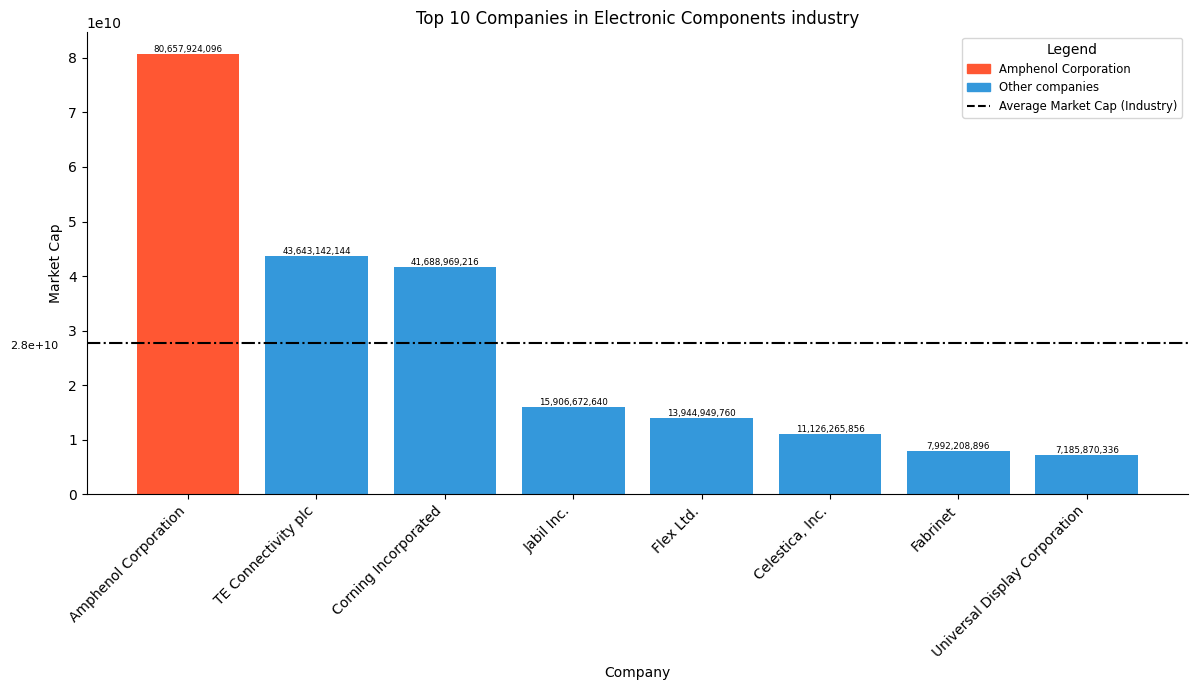

In [11]:
plt.figure(figsize=(12,7))

bars_2 = plt.bar(top_10_ind['company_name'],
               top_10_ind['market_cap'],
               color=colors_ind)


for bar in bars_2:
    x = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    plt.text(x, height, f'{int(height):,}', ha='center', va='bottom', fontsize=6.3)

dashed_line_2 = mlines.Line2D([], [], color='black', linestyle='--', label='Average Market Cap (Industry)')
plt.title(f"Top 10 Companies in {my_company_industry} industry")
plt.xlabel('Company')
plt.ylabel('Market Cap')
plt.axhline(y=my_industry_mean, color="black", linestyle='-.', label='average market cap')
plt.text(-1.2,my_industry_mean-0.15e+10, f'{my_industry_mean:.1e}',ha='center', va='bottom', fontsize=8, color='black')
plt.legend(handles=[red_patch,blue_patch,dashed_line_2], loc='upper right', title='Legend', fontsize='small', title_fontsize='medium')
plt.xticks(rotation=45, ha='right' )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

This bar chart compares the market cap of Amphenol Corporation to other companies in the electronic components industry.
Amphenol Corporation clearly stands out as the market leader in the electronic components industry considered in this chart. Its red bar is by far the highest, indicating a significantly larger market cap than all the other companies represented.

### Plot 4: 
A scatter plot displaying the relationship between "total_revenue" and "net_income"
for companies in the same sector. All companies are plotted in Color#2, while the selected
company is distinguished by a larger Color#1 marker

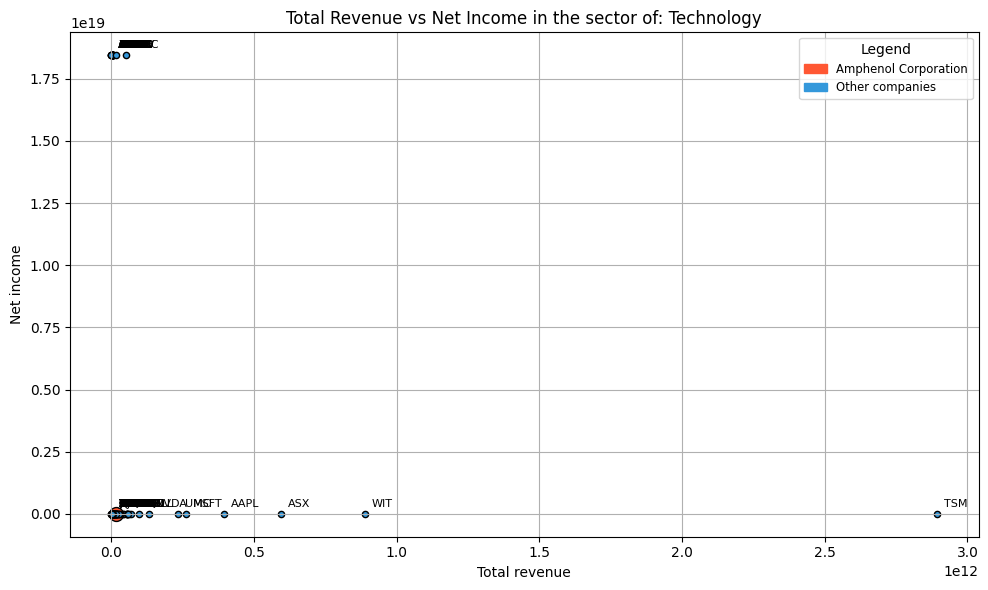

In [12]:
plt.figure(figsize=(10,6))

for idx, row in sorted_df_sector.iterrows():
    if row['company_name'] == my_company['company_name']:
        plt.scatter(row['total_revenue'], row['net_income'], color=color_selected,edgecolor='black', s=100)
    else :
        plt.scatter(row['total_revenue'], row['net_income'], color=color_others,edgecolor='black', s=20)
    plt.annotate(row["symbol"],
                 (row["total_revenue"], row["net_income"]),
                 textcoords="offset points", xytext=(5, 5), fontsize=8)

plt.title(f"Total Revenue vs Net Income in the sector of: {my_company_sector}")
plt.xlabel('Total revenue')
plt.ylabel('Net income')
plt.grid(True)
plt.legend(handles=[red_patch, blue_patch], loc='upper right', title='Legend', fontsize='small', title_fontsize='medium')

plt.tight_layout()
plt.show()

This graph is not clear because the dots overlap. This arises from a strong inhomogeneity in the values ​​of total_revenue and net_income: some companies have extremely higher values ​​(outliers), visually compressing all the others. So for this reason I decided to proceed through filtering

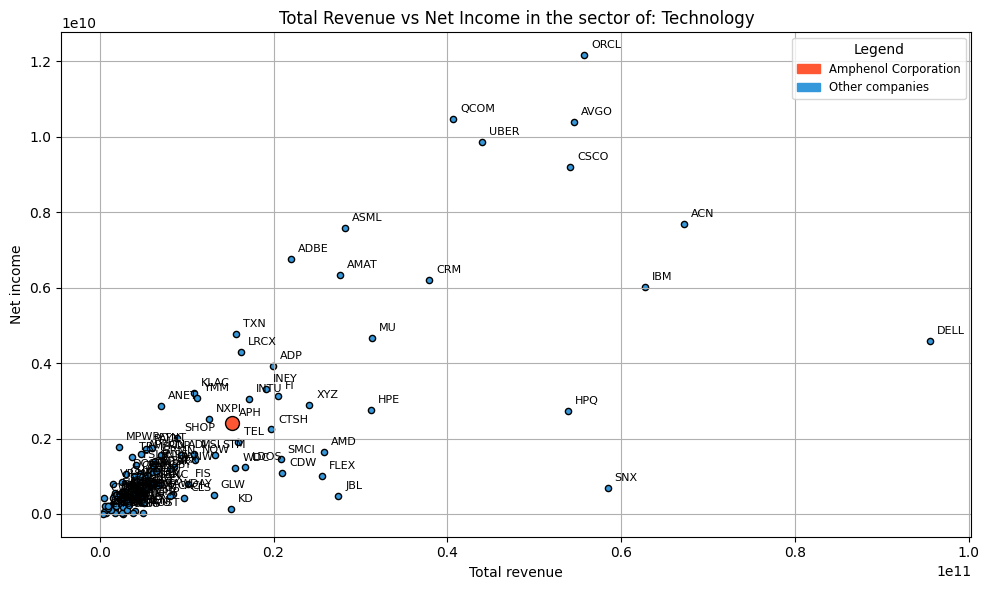

In [13]:
min_total_revenue = 0       
max_total_revenue = 2e+11     
min_net_income = 0          
max_net_income = 0.2e+11        


filtered_df = sorted_df_sector[
    (sorted_df_sector["total_revenue"] >= min_total_revenue) &
    (sorted_df_sector["total_revenue"] <= max_total_revenue) &
    (sorted_df_sector["net_income"] >= min_net_income) &
    (sorted_df_sector["net_income"] <= max_net_income) 
]


plt.figure(figsize=(10,6))

for idx, row in filtered_df.iterrows():
    if row['company_name'] == my_company['company_name']:
        plt.scatter(row['total_revenue'], row['net_income'], color=color_selected,edgecolor='black', s=100)
    else :
        plt.scatter(row['total_revenue'], row['net_income'], color=color_others,edgecolor='black', s=20)
    plt.annotate(row["symbol"],
                 (row["total_revenue"], row["net_income"]),
                 textcoords="offset points", xytext=(5, 5), fontsize=8)

plt.title(f"Total Revenue vs Net Income in the sector of: {my_company_sector}")
plt.xlabel('Total revenue')
plt.ylabel('Net income')
plt.grid(True)
plt.legend(handles=[red_patch, blue_patch], loc='upper right', title='Legend', fontsize='small', title_fontsize='medium')

plt.tight_layout()
plt.show()


This scatterplot provides an overview of the relationship between revenue and net income for several technology companies, highlighting how Amphenol Corporation stacks up against its competitors on these two metrics. There are some much larger and more profitable companies, as well as a larger group of companies with lower revenue and net income.

## 4. Final Layout:

• Combine all four plots into a single figure with subplots to provide a comprehensive and
coherent analysis of the selected company in comparison to its peers.

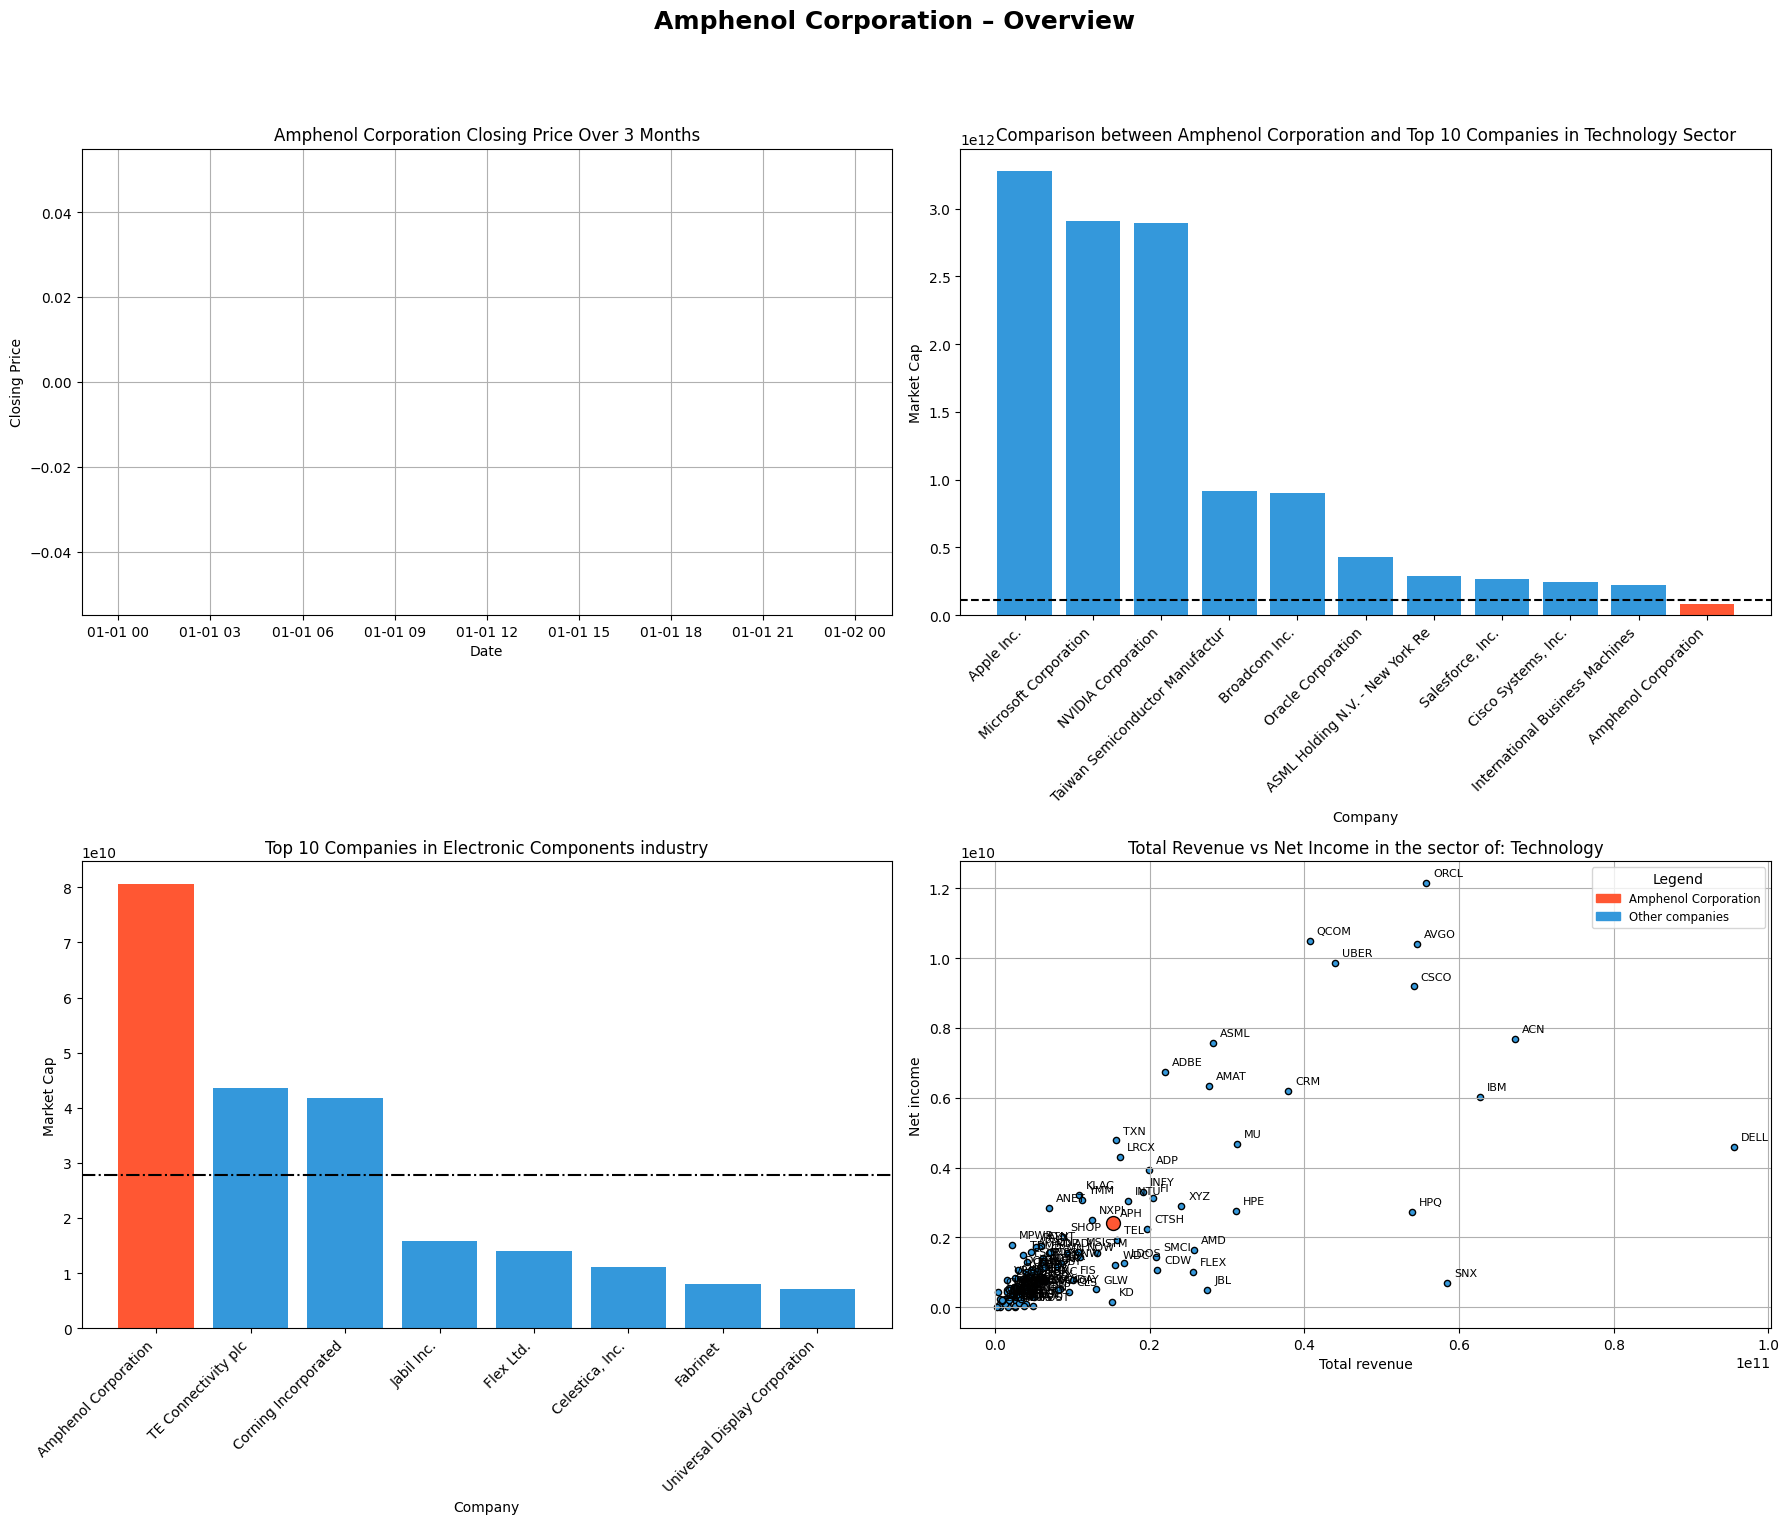

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(18, 16))


fig.suptitle(f"{my_company['company_name']} – Overview", fontsize=18, fontweight='bold')

# Plot 1 
axs[0, 0].plot(stock_data.index, stock_data["Close"],color = color_selected)
axs[0, 0].set_title(f"{my_company['company_name']} Closing Price Over 3 Months")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Closing Price")
axs[0, 0].grid(True)

# Plot 2
colors = [color_selected if x == my_company['company_name'] else color_others for x in top_10_with_my_company['company_name']]
axs[0, 1].bar(top_10_with_my_company['company_name'], top_10_with_my_company['market_cap'], color=colors)
axs[0, 1].axhline(y=my_sector_mean, color="black", linestyle='--', label='Average market cap')
axs[0, 1].set_title(f"Comparison between {my_company['company_name']} and Top 10 Companies in {my_company_sector} Sector")
axs[0, 1].set_xlabel("Company")
axs[0, 1].set_ylabel("Market Cap")
for label in axs[0, 1].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')



# Plot 3
colors_ind = [color_selected if x == my_company['company_name'] else color_others for x in top_10_ind['company_name']]
axs[1, 0].bar(top_10_ind['company_name'],top_10_ind['market_cap'], color=colors_ind)
axs[1, 0].axhline(y=my_industry_mean, color="black", linestyle='-.', label='average market cap')
axs[1, 0].set_title(f"Top 10 Companies in {my_company_industry} industry")
axs[1, 0].set_xlabel("Company")
axs[1, 0].set_ylabel("Market Cap")
for label in axs[1, 0].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')



# Plot 4
ax = axs[1, 1] 

for idx, row in filtered_df.iterrows():
    if row['company_name'] == my_company['company_name']:
        ax.scatter(row['total_revenue'], row['net_income'], color=color_selected, edgecolor='black', s=100)
    else:
        ax.scatter(row['total_revenue'], row['net_income'], color=color_others, edgecolor='black', s=20)
    
    ax.annotate(row["symbol"],
                (row["total_revenue"], row["net_income"]),
                textcoords="offset points", xytext=(5, 5), fontsize=8)


ax.set_title(f"Total Revenue vs Net Income in the sector of: {my_company_sector}")
ax.set_xlabel('Total revenue')
ax.set_ylabel('Net income')
ax.grid(True)
ax.legend(handles=[red_patch, blue_patch], loc='upper right', title='Legend',
          fontsize='small', title_fontsize='medium')




plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

# HOMEWORK#2: Fundamental Analysis of	a Company

## Phase	1	– Data	Preparation
From	the	provided	file	Symbol_Info.csv,	students	must:

• Create	a	DataFrame	containing	only	the	columns	needed	for	the	analysis	(see	Phase	
2).	For	example, to	calculate	Net	Profit	Margin,	net_income	and	total_revenue	are	
needed

In [15]:
df2 = pd.read_csv("Symbols_info_modified.csv")
required_columns = [
    "net_income", "total_revenue",                  
    "return_on_assets",                              
    "return_on_equity",                              
    "profit_margins",                                
    "pe_trailing", "pe_forward",                     
    "earnings_growth",                               
    "price_to_sales", "price_to_book",               
    "revenue_growth",                                
    "debt_to_equity", "dividend_yield",              
    "payout_ratio", "free_cashflow"                  
]
#df2 = df2[required_columns + ['symbol']]  
df2 = df2[required_columns + ['symbol', 'sector', 'industry', 'country', 'market_cap']]

my_company2 = df2[df2['symbol'] == my_company_symbol]



• Remove	all	companies	(rows)	where	at	least	one	required	value	is	missing.	If	a	value	
is	missing	for	the	company	you	were	assigned,	retrieve	it	from	output.csv	(provided	
for	Homework	#1).

In [16]:

missing_count = my_company2.isnull().sum()
print(f"Your company has {missing_count} missing values.")


Your company has net_income          0
total_revenue       0
return_on_assets    0
return_on_equity    0
profit_margins      0
pe_trailing         0
pe_forward          0
earnings_growth     0
price_to_sales      0
price_to_book       0
revenue_growth      0
debt_to_equity      0
dividend_yield      0
payout_ratio        0
free_cashflow       0
symbol              0
sector              0
industry            0
country             0
market_cap          0
dtype: int64 missing values.


In [17]:
df2_clean = df2.dropna()
missing_count2 = df2_clean.isnull().sum()
print(missing_count2)

net_income          0
total_revenue       0
return_on_assets    0
return_on_equity    0
profit_margins      0
pe_trailing         0
pe_forward          0
earnings_growth     0
price_to_sales      0
price_to_book       0
revenue_growth      0
debt_to_equity      0
dividend_yield      0
payout_ratio        0
free_cashflow       0
symbol              0
sector              0
industry            0
country             0
market_cap          0
dtype: int64


•Add	new	calculated	columns	based	on	the	formulas	listed	in	Phase	2. 

•Create	a	new	DataFrame	containing	only	the	final	calculated	metrics.	For	example,	
only	the	Net	Profit	Margin	column,	not	net_income	or	total_revenue.

In [18]:

df_final = df2_clean.copy()

df_final["net_profit_margin"] = df_final["net_income"] / df_final["total_revenue"]
df_final["peg_ratio"] = df_final["pe_forward"] / df_final["earnings_growth"]

print(df_final.columns.tolist())

final_columns = [
    "symbol",
    "net_profit_margin",        
    "return_on_assets",
    "return_on_equity",
    "profit_margins",
    "pe_trailing",
    "pe_forward",
    "peg_ratio",                     
    "price_to_sales",
    "price_to_book",
    "revenue_growth",
    "earnings_growth",
    "debt_to_equity",
    "dividend_yield",
    "payout_ratio",
    "free_cashflow"
]


metrics_df = df_final[final_columns]
#print(metrics_df)


['net_income', 'total_revenue', 'return_on_assets', 'return_on_equity', 'profit_margins', 'pe_trailing', 'pe_forward', 'earnings_growth', 'price_to_sales', 'price_to_book', 'revenue_growth', 'debt_to_equity', 'dividend_yield', 'payout_ratio', 'free_cashflow', 'symbol', 'sector', 'industry', 'country', 'market_cap', 'net_profit_margin', 'peg_ratio']


## Phase	3	– Peer	Comparison

### Metric 1: Profit Margin

One of the first things we looked at was Profit Margin. 
This metric measures the share of net income in total revenue: essentially, it tells us how much the company actually earns from each dollar of sales. 
It is a key indicator of profitability. The higher it is, the more efficient the company is at turning revenue into profit.

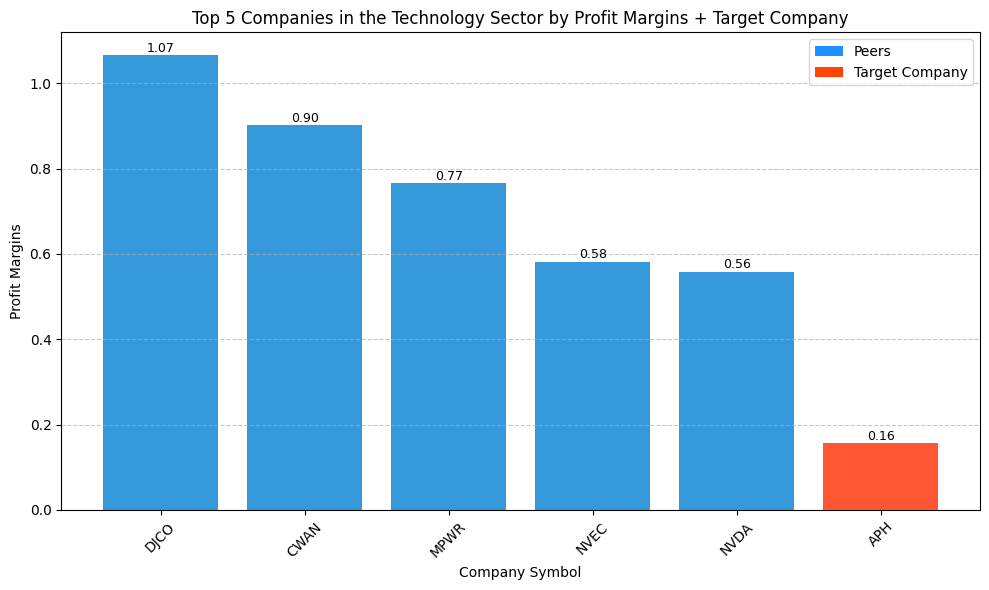

In [19]:
sorted_df_sector2 = df_final[df_final['sector'] == my_company_sector]
sorted_df_sector2 = sorted_df_sector2.sort_values(by="profit_margins", ascending=False)

top5_sector = sorted_df_sector2.head(5)

if my_company_symbol not in top5_sector["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_sector = pd.concat([top5_sector, target_row])

top5_sector = top5_sector.sort_values(by="profit_margins", ascending=False)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_sector["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_sector["symbol"], top5_sector["profit_margins"], color=colors)
plt.title(f"Top 5 Companies in the {my_company_sector} Sector by Profit Margins + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Profit Margins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)


legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


In the first chart, we look at APH’s position compared to the five most profitable companies in the technology sector. Here, the gap is notable: while top performers such as DJCO and CWAN are well above 0.9–1.0, APH is at 0.16, clearly outside the top five. This suggests that the company is not among the most profitable in its sector.

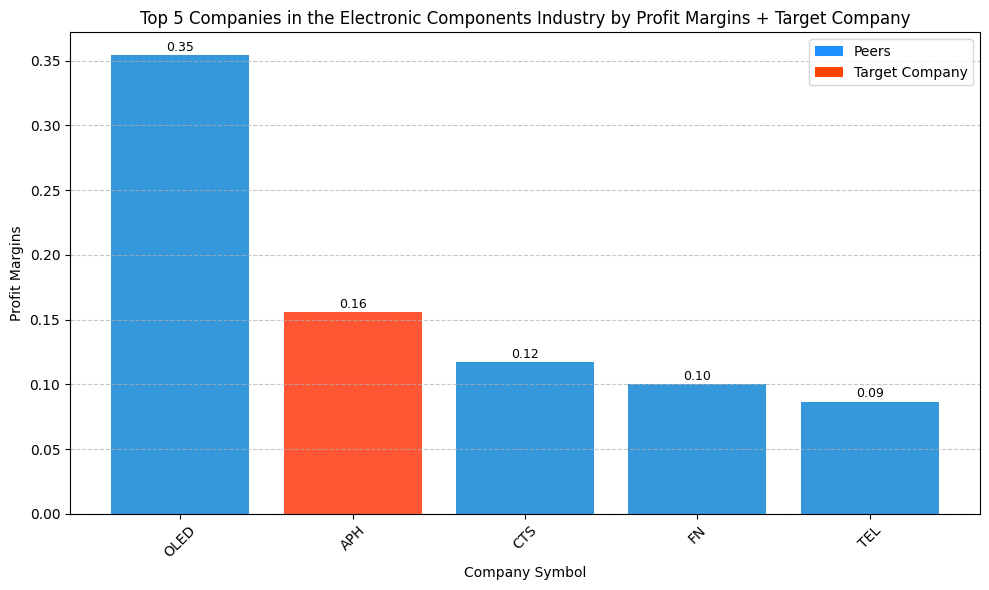

In [20]:
sorted_df_industry2 = df_final[df_final['industry'] == my_company_industry]
sorted_df_industry2 = sorted_df_industry2.sort_values(by="profit_margins", ascending=False)

top5_industry2 = sorted_df_industry2.head(5)

if my_company_symbol not in top5_industry2["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_industry2 = pd.concat([top5_industry2, target_row])

top5_industry2 = top5_industry2.sort_values(by="profit_margins", ascending=False)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_industry2["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_industry2["symbol"], top5_industry2["profit_margins"], color=colors)
plt.title(f"Top 5 Companies in the {my_company_industry} Industry by Profit Margins + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Profit Margins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


If we look at the context of the industry, that is, the electronic components industry, APH manages to enter the top five companies, positioning itself second, behind OLED but ahead of CTS, FN and TEL. Even if the absolute value (0.16) remains unchanged, its relative meaning changes a lot: here APH proves to be more competitive compared to similar companies.

3145       0.0000
3146       0.0000
3148       0.0000
3151       0.0000
3153       0.0000
          ...    
2094    2055.6667
289           inf
1885          inf
214           inf
1469          inf
Name: pe_trailing, Length: 2737, dtype: float64


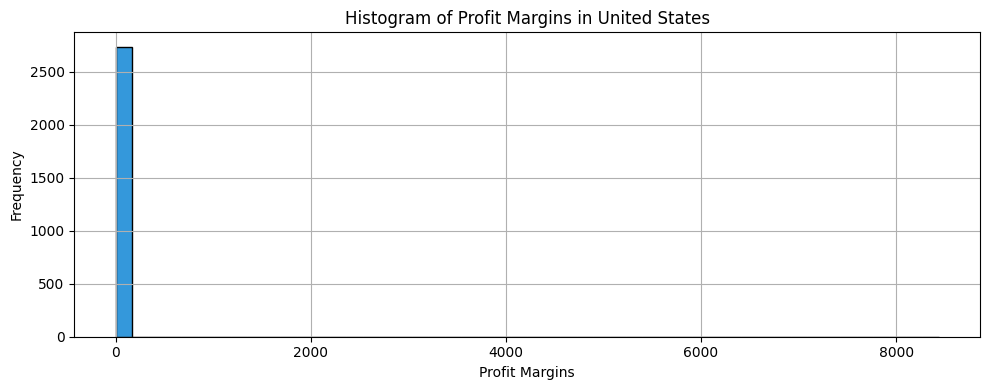

2736 out of 2737 companies (99.96%) in United States have profit margins below 100.


In [21]:

my_company_country = my_company['country'] 
#print(f'The country of my company is: {my_company_country}')


df_country = df_final[df_final["country"] == my_company_country]
print(df_country ["pe_trailing"].sort_values())
profit_values = df_country["profit_margins"].replace([np.inf, -np.inf], np.nan).dropna()


plt.figure(figsize=(10, 4))
plt.hist(profit_values, bins=50, color="#3498DB", edgecolor="black")
plt.title(f"Histogram of Profit Margins in {my_company_country}")
plt.xlabel("Profit Margins")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



count_under_100 = (profit_values < 100).sum()

total_count = profit_values.shape[0]

percent = round((count_under_100 / total_count) * 100, 2)
print(f"{count_under_100} out of {total_count} companies ({percent}%) in {my_company_country} have profit margins below 100.")





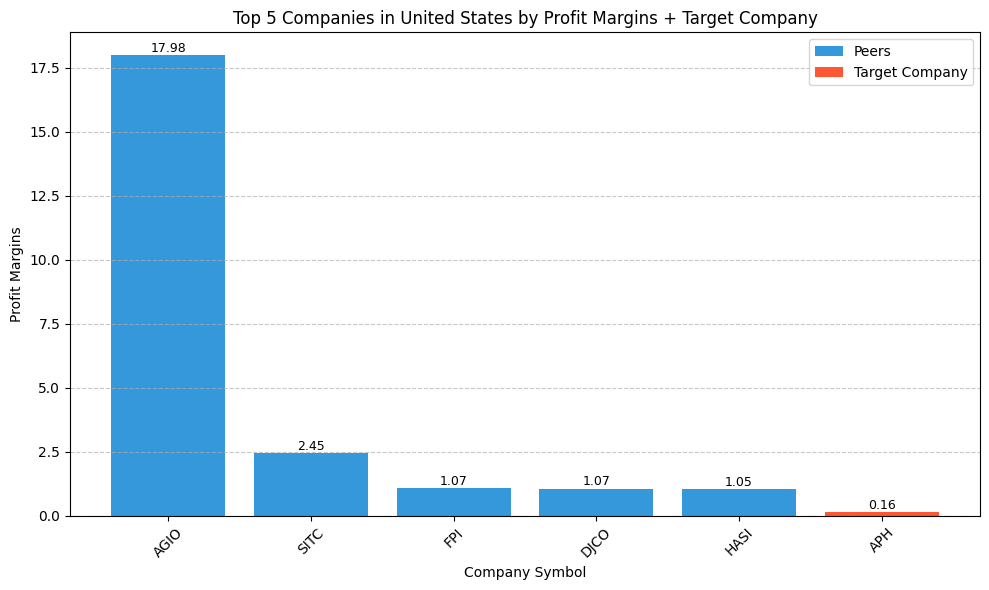

In [22]:

threshold = 100  

my_country = my_company["country"]
my_value = float(my_company["profit_margins"])


filtered_df_country = df_final[
    (df_final["country"] == my_country) &
    (df_final["profit_margins"] < threshold)
]


sorted_df_country = filtered_df_country.sort_values(by="profit_margins", ascending=False)


top5_country = sorted_df_country.head(5)


if my_company_symbol not in top5_country["symbol"].values and my_value < threshold:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_country = pd.concat([top5_country, target_row])

top5_country = top5_country.sort_values(by="profit_margins", ascending=False)


colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_country["symbol"]]


plt.figure(figsize=(10, 6))
bars = plt.bar(top5_country["symbol"], top5_country["profit_margins"], color=colors)
plt.title(f"Top 5 Companies in {my_country} by Profit Margins + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Profit Margins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)


legend_elements = [
    Patch(facecolor=color_others, label='Peers'),
    Patch(facecolor=color_selected, label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


At the national level, to understand the distribution of profit margins among US companies, we used a histogram. This clearly shows the presence of extreme outliers, with values ​​that even exceed 8000. Such data risks distorting the analysis. For this reason, I decided to apply a maximum threshold of 100 to exclude unrealistic or anomalous values.

The graph of the top 5 US companies by profit margin, filtered with the threshold, shows that APH is far from the top. Companies like AGIO even exceed the value of 17.98, while APH remains at 0.16. This highlights a much lower profitability than many US competitors.

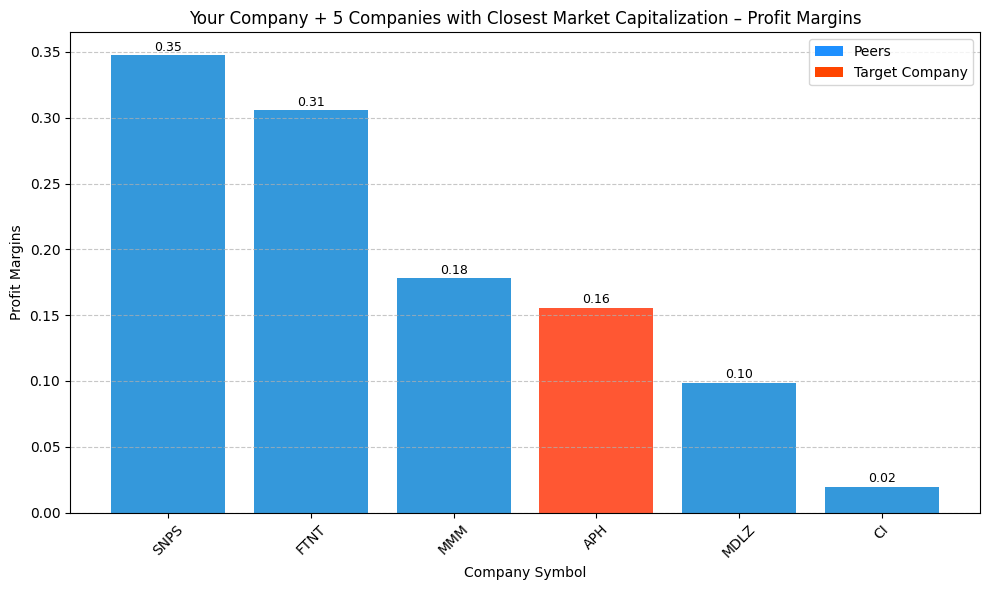

In [23]:
my_market_cap = my_company["market_cap"]

df_final["market_cap_distance"] = abs(df_final["market_cap"] - my_market_cap)

others = df_final[df_final["symbol"] != my_company_symbol]
closest_5 = others.sort_values("market_cap_distance").head(5)

my_row = df_final[df_final["symbol"] == my_company_symbol]
comparison_df = pd.concat([closest_5, my_row])

comparison_df = comparison_df.sort_values(by="profit_margins", ascending=False)

colors = [color_selected if sym == my_company_symbol else color_others for sym in comparison_df["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df["symbol"], comparison_df["profit_margins"], color=colors)
plt.title("Your Company + 5 Companies with Closest Market Capitalization – Profit Margins")
plt.xlabel("Company Symbol")
plt.ylabel("Profit Margins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)
    
legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


When the comparison is made with companies that have a similar market capitalization, therefore more “comparable” in terms of size, APH’s positioning improves. In this case, the company is in the middle of the group, with a value similar or higher than some of the neighboring companies. It is an interesting comparison because it allows you to evaluate the performance in more proportionate terms.

### Metric 2: P/E	Trailing


Moving on to another key metric, we looked at the Trailing P/E. This indicator, which represents the ratio between the share price and the earnings per share over the last 12 months, is commonly used to assess whether a company is overvalued or undervalued. A very high P/E can indicate strong growth expectations, but also a potential overvaluation of the stock.

2535       0.0000
692        0.0000
1452       0.0000
2359       0.0000
2648       0.0000
          ...    
719     1993.0001
2094    2055.6667
1885          inf
289           inf
1469          inf
Name: pe_trailing, Length: 445, dtype: float64


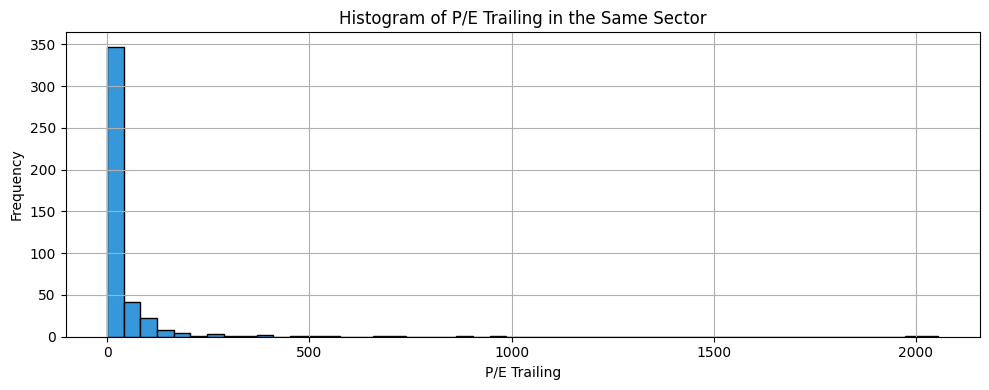

In [24]:
print(sorted_df_sector2["pe_trailing"].sort_values())

valid_pe = sorted_df_sector2["pe_trailing"].replace([np.inf, -np.inf], np.nan).dropna()



plt.figure(figsize=(10, 4))
plt.hist(valid_pe, bins=50, color="#3498DB", edgecolor="black")
plt.title("Histogram of P/E Trailing in the Same Sector")
plt.xlabel("P/E Trailing")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



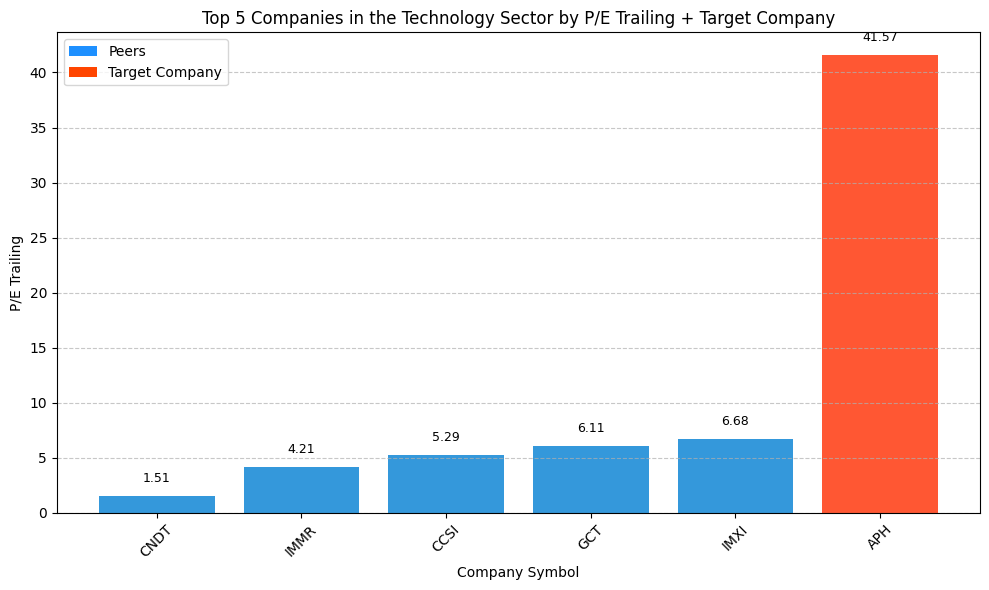

In [25]:
df_sector_pe = sorted_df_sector2[
    (sorted_df_sector2["pe_trailing"] > 0) &
    (sorted_df_sector2["pe_trailing"] < 100)
]

df_sector_pe_sorted = df_sector_pe.sort_values(by="pe_trailing", ascending=True)

top5_sector_pe = df_sector_pe_sorted.head(5)

if my_company_symbol not in top5_sector_pe["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_sector_pe = pd.concat([top5_sector_pe, target_row])

top5_sector_pe = top5_sector_pe.sort_values(by="pe_trailing", ascending=True)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_sector_pe["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_sector_pe["symbol"], top5_sector_pe["pe_trailing"], color=colors)
plt.title(f"Top 5 Companies in the {my_company_sector} Sector by P/E Trailing + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("P/E Trailing")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)
    
legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


The first step was to examine the distribution of this metric within the technology sector. Here too, as happened with margins, we found a strong asymmetry: most companies have values ​​below 100, but there are outliers that even exceed 2000. To make the analyses more readable, a maximum threshold of 100 was therefore defined.

In the graph showing the sector comparison, it is clearly visible that APH has a Trailing P/E of around 41.57, which places it well above the five top performers, whose values ​​​​vary between 1.5 and 6.6. This is a figure that should be interpreted with caution: it could indicate a very high market valuation, but also a risk of overvaluation.

1810      0.000000
2145      0.000000
278       0.000000
2395      0.000000
2504     19.611110
1104     19.933651
761      21.791878
363      21.972477
1754     22.541666
364      23.840979
1122     25.263393
2263     25.698444
383      25.902777
2137     27.487244
629      31.601671
2095     32.024950
2773     34.943480
1540     37.581080
2882     39.533333
200      41.567963
131      54.362072
1675     57.102097
1605     62.962960
2449     77.688890
2988     83.358500
1241     90.403850
807     373.250030
Name: pe_trailing, dtype: float64


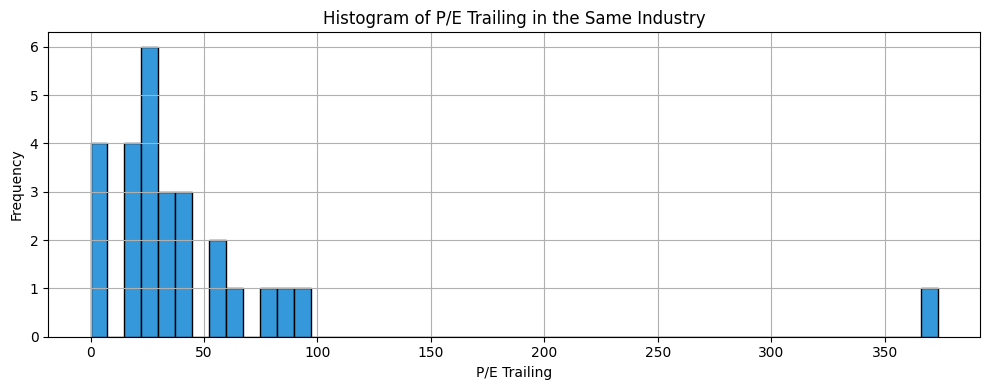

26 out of 27 companies in Electronic Components industry have P/E Trailing < 100 (96.3%).


In [26]:
print(sorted_df_industry2["pe_trailing"].sort_values())

valid_pe = sorted_df_industry2["pe_trailing"].replace([np.inf, -np.inf], np.nan).dropna()



plt.figure(figsize=(10, 4))
plt.hist(valid_pe, bins=50, color="#3498DB", edgecolor="black")
plt.title("Histogram of P/E Trailing in the Same Industry")
plt.xlabel("P/E Trailing")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


count_under_100 = (valid_pe < 100).sum()

total_count = valid_pe.shape[0]

percent = round((count_under_100 / total_count) * 100, 2)


print(f"{count_under_100} out of {total_count} companies in {my_company_industry} industry have P/E Trailing < 100 ({percent}%).")


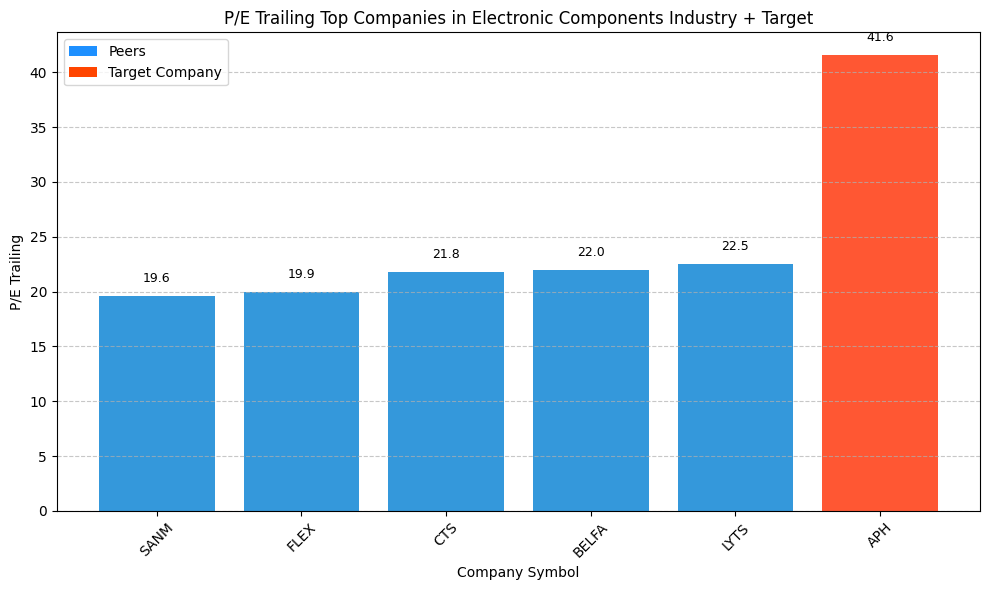

In [27]:

df_industry_pe = sorted_df_industry2.copy()
df_industry_pe = df_industry_pe[(df_industry_pe["pe_trailing"] > 0) & (df_industry_pe["pe_trailing"] < 100)]

df_industry_pe_sorted = df_industry_pe.sort_values(by="pe_trailing", ascending=True)


top5_pe_industry = df_industry_pe_sorted.head(5).copy()


if my_company_symbol not in top5_pe_industry["symbol"].values:
    target_row = df_industry_pe_sorted[df_industry_pe_sorted["symbol"] == my_company_symbol]
    if not target_row.empty:
        top5_pe_industry = pd.concat([top5_pe_industry, target_row])

top5_pe_industry = top5_pe_industry.sort_values(by="pe_trailing", ascending=True)


colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_pe_industry["symbol"]]


plt.figure(figsize=(10, 6))
bars = plt.bar(top5_pe_industry["symbol"], top5_pe_industry["pe_trailing"], color=colors)


plt.title(f"P/E Trailing Top Companies in {my_company_industry} Industry + Target")
plt.xlabel("Company Symbol")
plt.ylabel("P/E Trailing")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


We then analyzed the distribution of the Trailing P/E within the electronic components industry, where the situation appears more contained. In this case, the threshold of 100 is confirmed as adequate, as almost all the values ​​​​are between 0 and 60, with a single outlier towards 370.

In the graph dedicated to the industry, APH again shows a significantly higher P/E (41.6), placing itself outside the top 5 for lowest value, but above all in absolute value. This reinforces the hypothesis that the market places great expectations on the company, despite it not being among the most profitable.

3145       0.0000
3146       0.0000
3148       0.0000
3151       0.0000
3153       0.0000
          ...    
2094    2055.6667
289           inf
1885          inf
214           inf
1469          inf
Name: pe_trailing, Length: 2737, dtype: float64


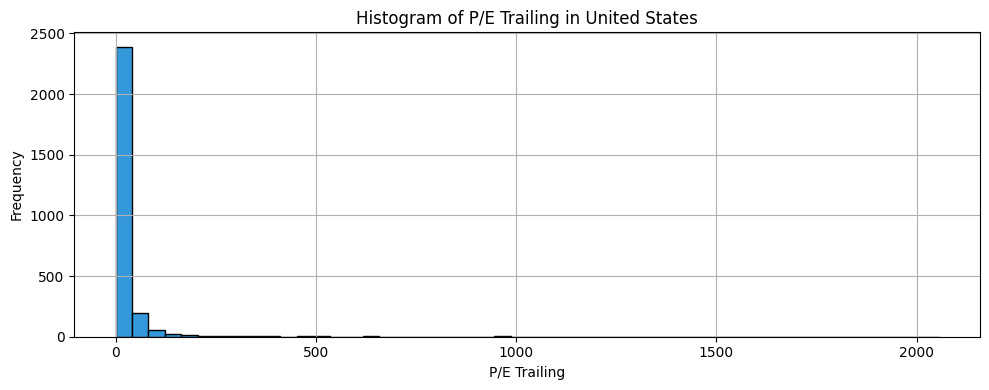

2689 out of 2733 companies in United States have P/E Trailing < 250 (98.39%).


In [28]:

print(df_final[df_final["country"] == my_company_country]["pe_trailing"].sort_values())


valid_pe_country = df_final[df_final["country"] == my_company_country]["pe_trailing"].replace([np.inf, -np.inf], np.nan).dropna()


plt.figure(figsize=(10, 4))
plt.hist(valid_pe_country, bins=50, color="#3498DB", edgecolor="black")
plt.title(f"Histogram of P/E Trailing in {my_company_country}")
plt.xlabel("P/E Trailing")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


count_under_250 = (valid_pe_country < 250).sum()
total_count = valid_pe_country.shape[0]
percent = round((count_under_250 / total_count) * 100, 2)

print(f"{count_under_250} out of {total_count} companies in {my_company_country} have P/E Trailing < 250 ({percent}%).")


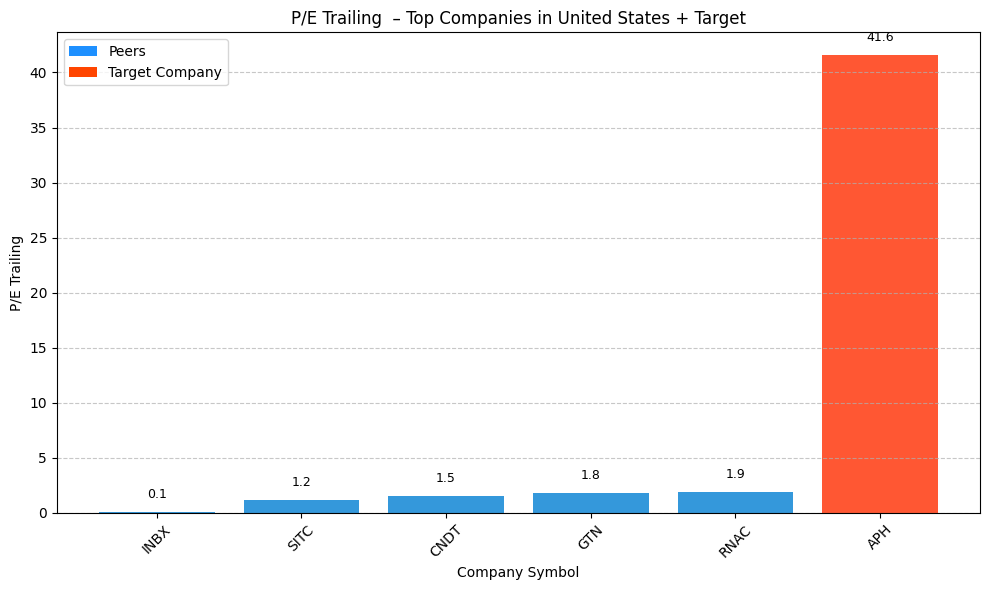

In [29]:

df_country_pe = df_final[df_final["country"] == my_company_country].copy()


df_country_pe = df_country_pe[(df_country_pe["pe_trailing"] > 0) & (df_country_pe["pe_trailing"] < 250)]


df_country_pe_sorted = df_country_pe.sort_values(by="pe_trailing", ascending=True)

top5_pe_country = df_country_pe_sorted.head(5).copy()


if my_company_symbol not in top5_pe_country["symbol"].values:
    target_row = df_country_pe_sorted[df_country_pe_sorted["symbol"] == my_company_symbol]
    if not target_row.empty:
        top5_pe_country = pd.concat([top5_pe_country, target_row])


top5_pe_country = top5_pe_country.sort_values(by="pe_trailing", ascending=True)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_pe_country["symbol"]]


plt.figure(figsize=(10, 6))
bars = plt.bar(top5_pe_country["symbol"], top5_pe_country["pe_trailing"], color=colors)


plt.title(f"P/E Trailing  – Top Companies in {my_company_country} + Target")
plt.xlabel("Company Symbol")
plt.ylabel("P/E Trailing")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


In the chart, we see that APH has a P/E of 41.6, significantly higher than the other American companies in the chart, which all fluctuate between 0.1 and 1.9. This data indicates that, compared to the top 5 American companies with the lowest P/E, APH appears much more "expensive" in relative terms. This could again be due to high growth expectations by investors, or an overvaluation compared to the domestic market.

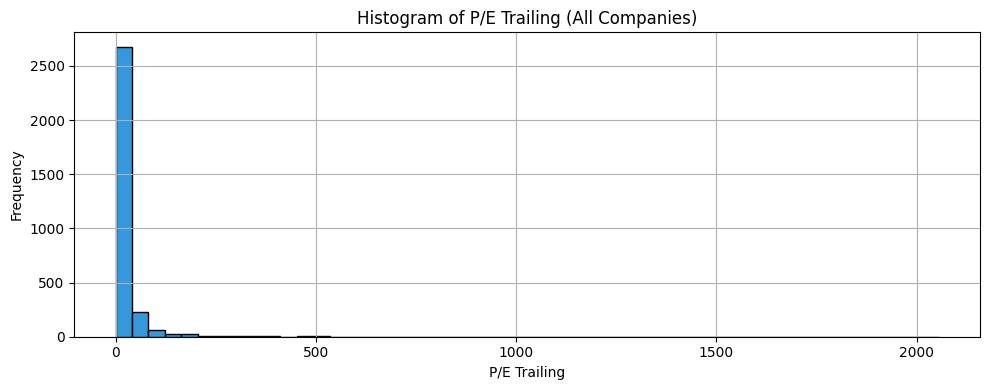

3037 out of 3065 companies have P/E Trailing < 400 (99.09%).


In [30]:

valid_pe_all = df_final["pe_trailing"].replace([np.inf, -np.inf], np.nan).dropna()


plt.figure(figsize=(10, 4))
plt.hist(valid_pe_all, bins=50, color="#3498DB", edgecolor="black")
plt.title("Histogram of P/E Trailing (All Companies)")
plt.xlabel("P/E Trailing")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


count_under_400 = (valid_pe_all < 400).sum()
total_count = valid_pe_all.shape[0]
percent = round((count_under_400 / total_count) * 100, 2)

print(f"{count_under_400} out of {total_count} companies have P/E Trailing < 400 ({percent}%).")


The histogram shows the distribution of trailing P/E across the entire sample of companies. The vast majority have a P/E below 100, with a huge concentration between 0 and 50. APH's value (41.6) is within the 400 threshold (used to limit outliers), but is still at the high end of the distribution. This confirms that APH is relatively highly valued compared to the market average.

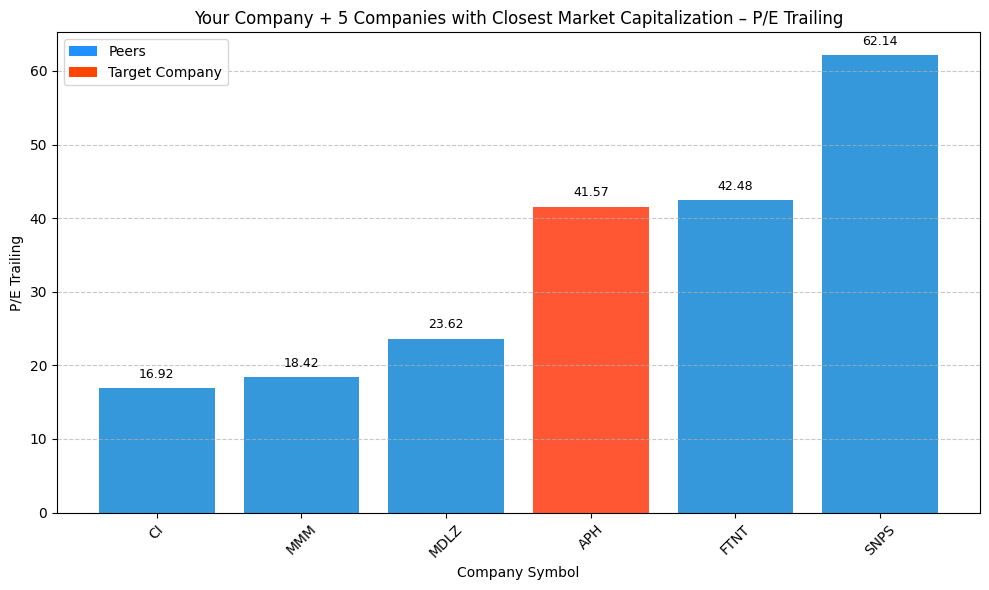

In [31]:
my_market_cap = my_company["market_cap"]
df_final["market_cap_distance"] = abs(df_final["market_cap"] - my_market_cap)
others_pe = df_final[df_final["symbol"] != my_company_symbol]

closest_5_pe = others_pe.sort_values("market_cap_distance").head(5)

my_row_pe = df_final[df_final["symbol"] == my_company_symbol]
comparison_df_pe = pd.concat([closest_5_pe, my_row_pe])

comparison_df_pe = comparison_df_pe.replace([np.inf, -np.inf], np.nan)
comparison_df_pe = comparison_df_pe.dropna(subset=["pe_trailing"])
comparison_df_pe = comparison_df_pe[
    (comparison_df_pe["pe_trailing"] > 0) & 
    (comparison_df_pe["pe_trailing"] < 400)
]

comparison_df_pe = comparison_df_pe.sort_values(by="pe_trailing", ascending=True)

colors = [color_selected if sym == my_company_symbol else color_others for sym in comparison_df_pe["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df_pe["symbol"], comparison_df_pe["pe_trailing"], color=colors)
plt.title("Your Company + 5 Companies with Closest Market Capitalization – P/E Trailing")
plt.xlabel("Company Symbol")
plt.ylabel("P/E Trailing")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 
plt.tight_layout()
plt.show()


In this comparison with similar companies by market capitalization, APH is among the most "expensive" in terms of valuation, with a P/E lower only than SNPS. The other companies have significantly lower P/Es, between 16.9 and 23.6. This reinforces the idea that APH is in a high valuation range even among its closest peers in terms of size.

### Metric 3: Revenue	Growth

Revenue growth measures the percentage change in revenue from the previous year. It is a key indicator of business expansion.

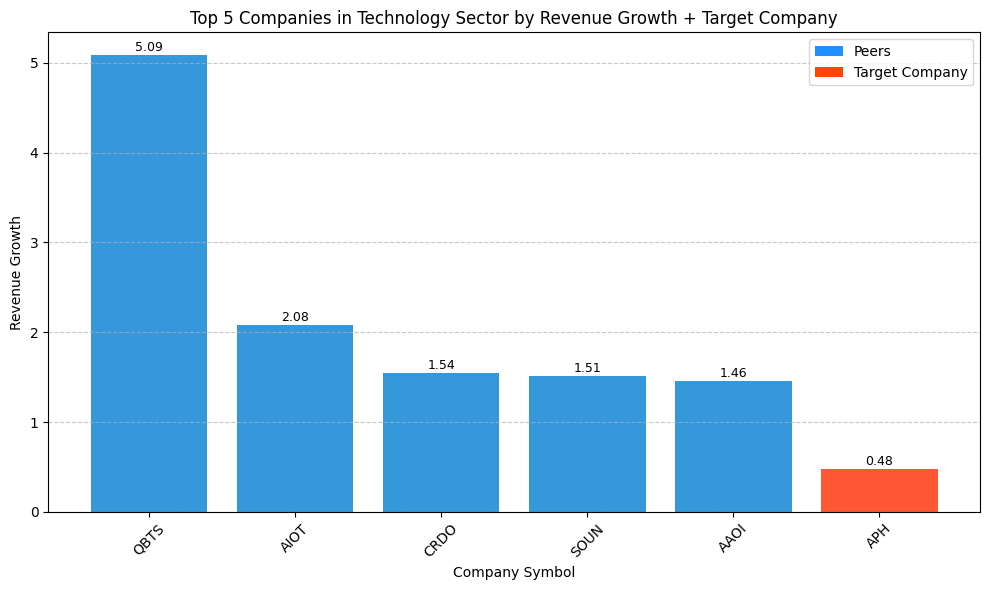

In [32]:
df_sector_revenue_sorted = sorted_df_sector2.sort_values(by="revenue_growth", ascending=False)

top5_sector_revenue = df_sector_revenue_sorted.head(5)

if my_company_symbol not in top5_sector_revenue["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_sector_revenue = pd.concat([top5_sector_revenue, target_row])

top5_sector_revenue = top5_sector_revenue.sort_values(by="revenue_growth", ascending=False)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_sector_revenue["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_sector_revenue["symbol"], top5_sector_revenue["revenue_growth"], color=colors)
plt.title(f"Top 5 Companies in {my_company_sector} Sector by Revenue Growth + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Revenue Growth")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


In the technology sector, APH shows a revenue growth of 0.48, significantly lower than the top performers in the sector (QBTS over 5, AIOT over 2). The company is well below the best in terms of sector growth.

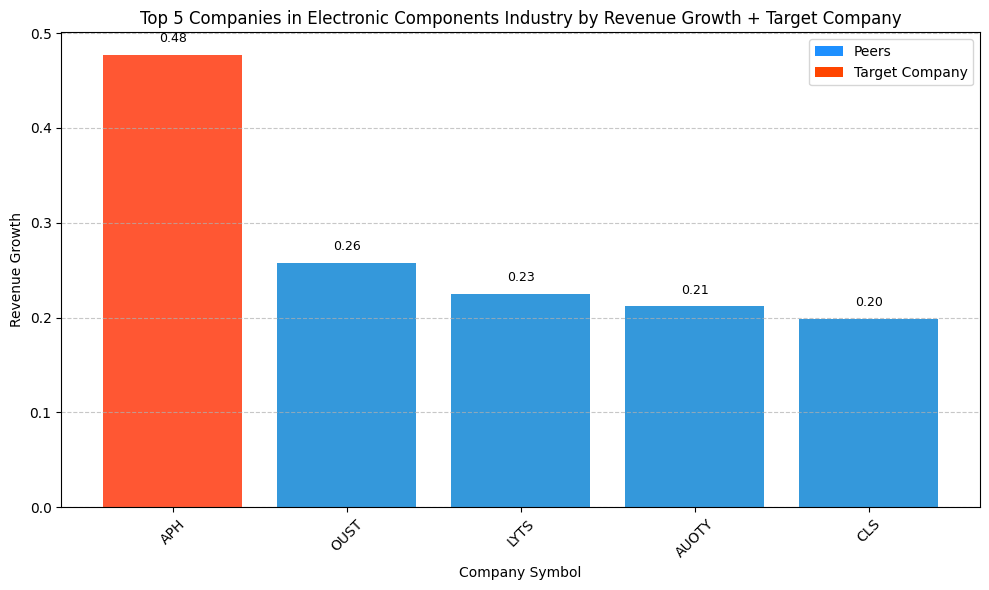

In [33]:
df_industry_revenue = sorted_df_industry2.replace([np.inf, -np.inf], np.nan)
df_industry_revenue = df_industry_revenue.dropna(subset=["revenue_growth"])

df_industry_revenue_sorted = df_industry_revenue.sort_values(by="revenue_growth", ascending=False)

top5_industry_revenue = df_industry_revenue_sorted.head(5)

if my_company_symbol not in top5_industry_revenue["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]


top5_industry_revenue = top5_industry_revenue.sort_values(by="revenue_growth", ascending=False)


colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_industry_revenue["symbol"]]


plt.figure(figsize=(10, 6))
bars = plt.bar(top5_industry_revenue["symbol"], top5_industry_revenue["revenue_growth"], color=colors)
plt.title(f"Top 5 Companies in {my_company_industry} Industry by Revenue Growth + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Revenue Growth")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


In this more focused comparison, APH stands out positively. It is in fact the company with the highest revenue growth within its specific industry (Electronic Components), clearly outperforming all others. This data contrasts with the sector analysis, suggesting that while APH does not excel in the broader technology sector, it shows superior growth dynamics in its industry segment.

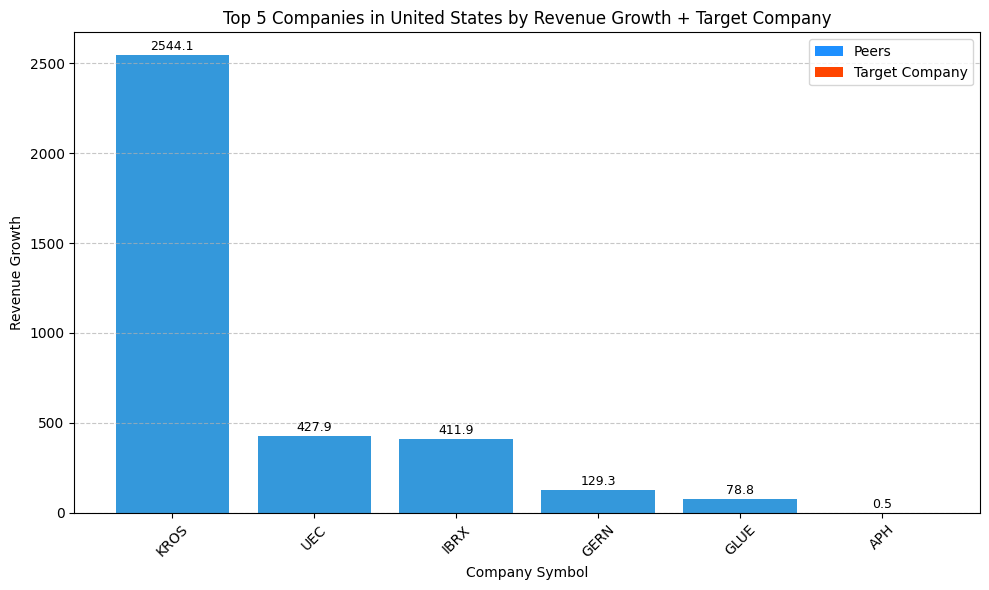

In [34]:

df_country_revenue_sorted = df_country.sort_values(by="revenue_growth", ascending=False)


top5_country_revenue = df_country_revenue_sorted.head(5)


if my_company_symbol not in top5_country_revenue["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_country_revenue = pd.concat([top5_country_revenue, target_row])


top5_country_revenue = top5_country_revenue.sort_values(by="revenue_growth", ascending=False)



colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_country_revenue["symbol"]]


plt.figure(figsize=(10, 6))
bars = plt.bar(top5_country_revenue["symbol"], top5_country_revenue["revenue_growth"], color=colors)

plt.title(f"Top 5 Companies in {my_company_country} by Revenue Growth + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Revenue Growth")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f"{height:.1f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()



Here the gap is clear: the first five American companies for revenue growth show very high percentages (up to 2544% for KROS), while APH remains marginal with 0.5%. This indicates that at a national level there are much more dynamic players.

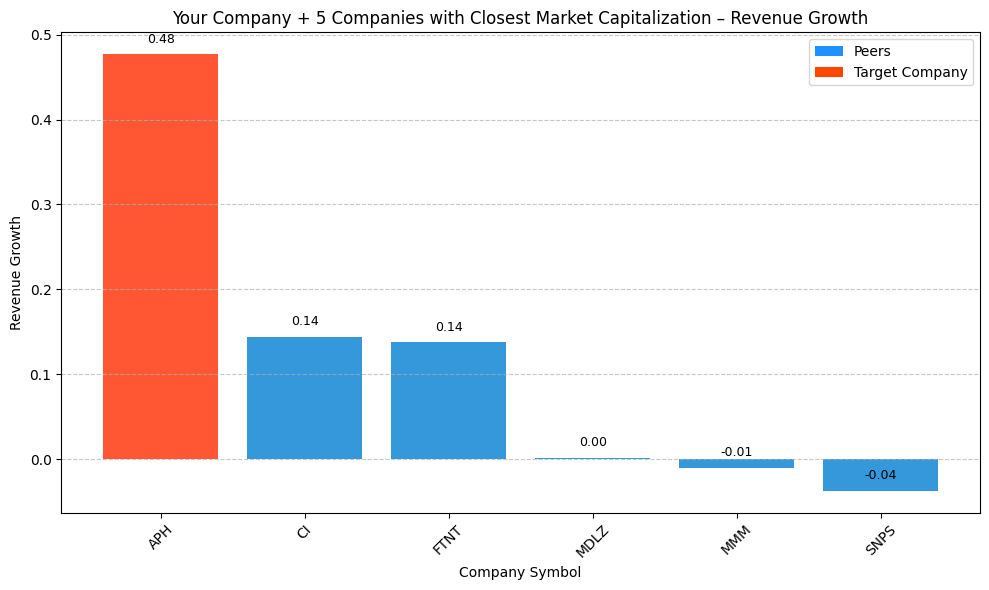

In [35]:

my_market_cap = my_company["market_cap"]
df_final["market_cap_distance"] = abs(df_final["market_cap"] - my_market_cap)

others = df_final[df_final["symbol"] != my_company_symbol]


closest_5 = others.sort_values("market_cap_distance").head(5)


my_row = df_final[df_final["symbol"] == my_company_symbol]
comparison_df = pd.concat([closest_5, my_row])


comparison_df = comparison_df.sort_values(by="revenue_growth", ascending=False)


colors = [color_selected if sym == my_company_symbol else color_others for sym in comparison_df["symbol"]]


plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df["symbol"], comparison_df["revenue_growth"], color=colors)
plt.title("Your Company + 5 Companies with Closest Market Capitalization – Revenue Growth")
plt.xlabel("Company Symbol")
plt.ylabel("Revenue Growth")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


APH manages to stand out positively in this analysis too: it is the company with the highest revenue growth among the 5 closest to it by market cap. The other companies show much more contained values, sometimes even negative. This reinforces the idea that, even in a context of high valuation (high P/E), APH maintains good growth performance compared to similar peers.

### Metric 4: Dividend Yield

Dividend yield represents the dividend yield relative to the share price. It is popular with income-oriented investors.

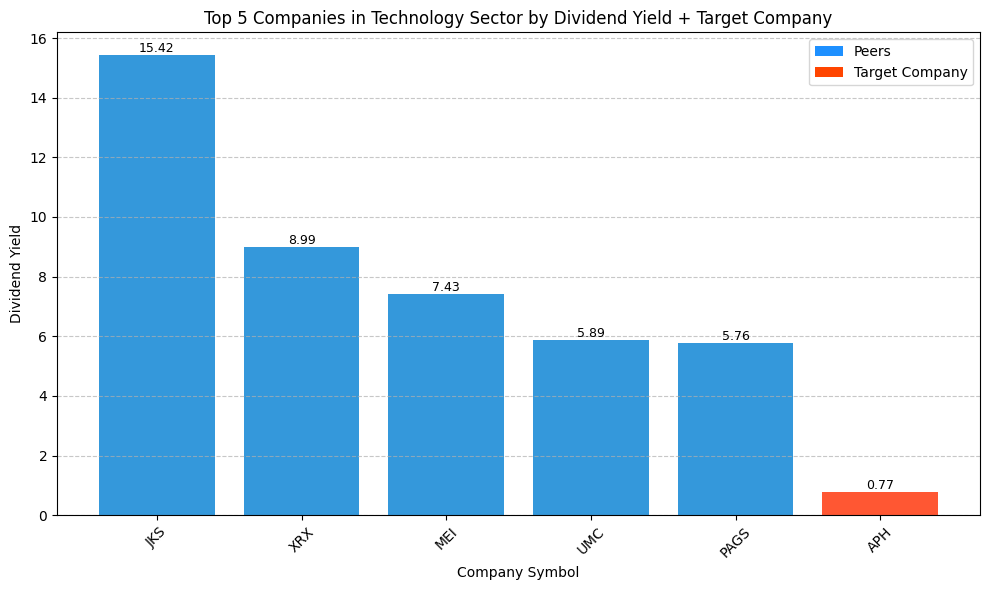

In [36]:
my_sector = my_company["sector"]

df_sector_dividend = df_final[df_final["sector"] == my_sector]

df_sector_dividend_sorted = df_sector_dividend.sort_values(by="dividend_yield", ascending=False)

top5_sector_dividend = df_sector_dividend_sorted.head(5)

if my_company_symbol not in top5_sector_dividend["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_sector_dividend = pd.concat([top5_sector_dividend, target_row])

top5_sector_dividend = top5_sector_dividend.sort_values(by="dividend_yield", ascending=False)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_sector_dividend["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_sector_dividend["symbol"], top5_sector_dividend["dividend_yield"], color=colors)
plt.title(f"Top 5 Companies in {my_sector} Sector by Dividend Yield + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Dividend Yield")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


In the technology sector, APH has a very low dividend yield (0.77), in stark contrast to the top companies, which even exceed 15%. This suggests that APH is not a stock to pick for dividend yield, but rather for growth or capital appreciation.

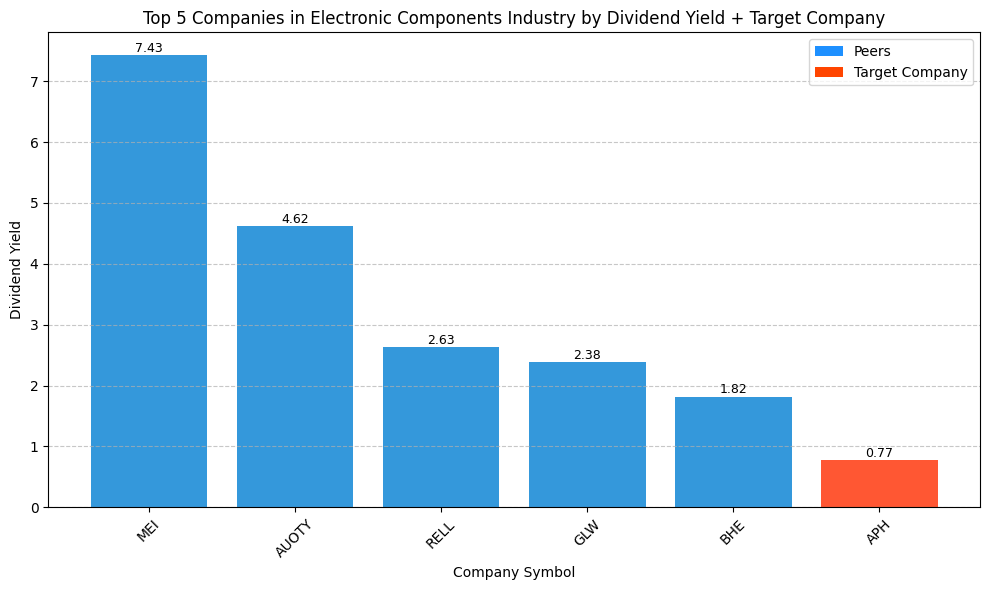

In [37]:

my_industry = my_company["industry"]

df_industry_dividend = df_final[df_final["industry"] == my_industry]

df_industry_dividend_sorted = df_industry_dividend.sort_values(by="dividend_yield", ascending=False)

top5_industry_dividend = df_industry_dividend_sorted.head(5)

if my_company_symbol not in top5_industry_dividend["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    top5_industry_dividend = pd.concat([top5_industry_dividend, target_row])

top5_industry_dividend = top5_industry_dividend.sort_values(by="dividend_yield", ascending=False)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_industry_dividend["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_industry_dividend["symbol"], top5_industry_dividend["dividend_yield"], color=colors)
plt.title(f"Top 5 Companies in {my_industry} Industry by Dividend Yield + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Dividend Yield")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)


legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


Even in its industry, APH has one of the lowest dividend yields. While it is in the top 5 for comparison, it is still far behind companies such as MEI (7.43%) and AUTY (4.62%). The company does not excel even in this narrower context.

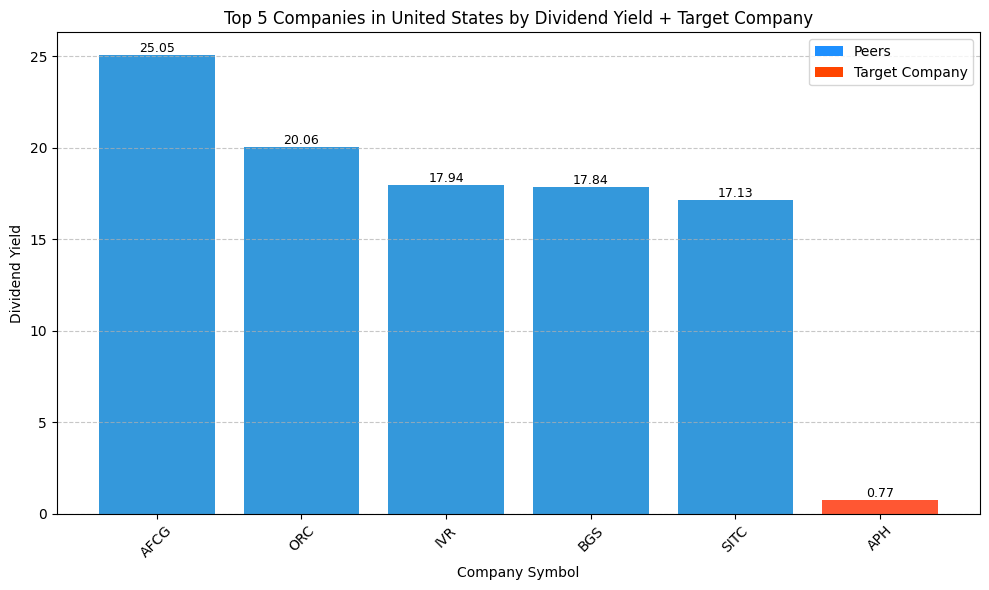

In [38]:

my_country = my_company["country"]

df_country_dividend = df_final[df_final["country"] == my_country]

df_country_dividend = df_country_dividend.replace([np.inf, -np.inf], np.nan)
df_country_dividend = df_country_dividend.dropna(subset=["dividend_yield"])

df_country_dividend_sorted = df_country_dividend.sort_values(by="dividend_yield", ascending=False)

top5_country_dividend = df_country_dividend_sorted.head(5)

if my_company_symbol not in top5_country_dividend["symbol"].values:
    target_row = df_final[df_final["symbol"] == my_company_symbol]
    if pd.notna(target_row["dividend_yield"].values[0]) and np.isfinite(target_row["dividend_yield"].values[0]):
        top5_country_dividend = pd.concat([top5_country_dividend, target_row])

top5_country_dividend = top5_country_dividend.sort_values(by="dividend_yield", ascending=False)

colors = [color_selected if sym == my_company_symbol else color_others for sym in top5_country_dividend["symbol"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_country_dividend["symbol"], top5_country_dividend["dividend_yield"], color=colors)
plt.title(f"Top 5 Companies in {my_country} by Dividend Yield + Target Company")
plt.xlabel("Company Symbol")
plt.ylabel("Dividend Yield")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


In a national comparison, APH's dividend yield is the lowest of all. Other U.S. companies in the chart offer yields between 17% and 25%. This again highlights that APH does not compete on this type of investor appeal.

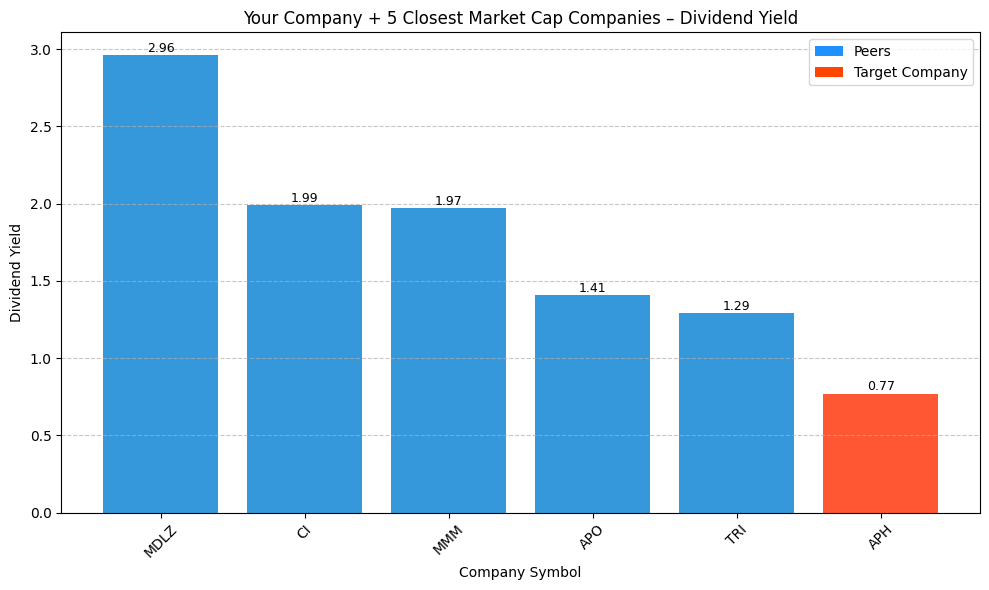

In [39]:
my_market_cap = my_company["market_cap"]
df_final["market_cap_distance"] = abs(df_final["market_cap"] - my_market_cap)


df_valid = df_final.replace([np.inf, -np.inf], np.nan)
df_valid = df_valid.dropna(subset=["dividend_yield"])
df_valid = df_valid[df_valid["dividend_yield"] > 0]

others = df_valid[df_valid["symbol"] != my_company_symbol]


closest_5 = others.sort_values("market_cap_distance").head(5)


my_row = df_valid[df_valid["symbol"] == my_company_symbol]
comparison_df = pd.concat([closest_5, my_row])


comparison_df = comparison_df.sort_values(by="dividend_yield", ascending=False)


colors = [color_selected if sym == my_company_symbol else color_others for sym in comparison_df["symbol"]]


plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df["symbol"], comparison_df["dividend_yield"], color=colors)
plt.title("Your Company + 5 Closest Market Cap Companies – Dividend Yield")
plt.xlabel("Company Symbol")
plt.ylabel("Dividend Yield")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)
    
legend_elements = [
    Patch(facecolor='dodgerblue', label='Peers'),
    Patch(facecolor='orangered', label='Target Company')
]
plt.legend(handles=legend_elements, loc='best') 

plt.tight_layout()
plt.show()


Even among companies with similar market cap, APH has the lowest dividend yield. The others fluctuate between 1.29 and 2.96, values ​​​​that are definitely more attractive for those looking for periodic returns.

The analysis conducted reveals a series of relevant considerations on the positioning of the APH company with respect to various financial metrics, observed through comparisons with the sector, the industry, the country of belonging and a group of companies with similar capitalization.

Starting from **profitability**, measured by the profit margin, APH shows rather low values. It is not placed among the top five companies either in the technology sector or at a national level. However, in its **specific industry (Electronic Components)**, it manages to have a more competitive position, placing itself in second place among the top 5. This suggests a stable but not exceptional performance compared to broader realities, while it appears more solid within its production niche.

Moving on to the **valuation**, expressed by the trailing P/E, the company stands out clearly but not in a positive sense. APH has a rather high value (41.6), higher than the market average and significantly higher than the top companies in the United States. This is consistent across all charts: APH is among the most expensive both relative to the sector, the industry, and companies with similar capitalization. The high P/E can indicate high growth expectations, but also a possible overvaluation, especially if not supported by exceptional performance.

From a **growth** perspective, however, a more encouraging picture emerges. At the sector and national level, APH does not stand out, but within its industry and in the group of companies with similar capitalization, the company is positioned **first** for revenue growth. This is a relevant element, which partially offsets the high valuation and suggests that market expectations could be partly justified by a good internal dynamic of revenue growth.

With regard to **financial strength**, measured indirectly through the dividend yield, APH shows a conservative policy. Its dividend yields are low in all comparisons made. It never appears among the top five neither in the sector nor in the country nor among peers. This could indicate a strategy of reinvesting profits to finance growth rather than distributing to shareholders, an approach typical of companies oriented towards expansion.

In conclusion, **APH does not stand out for its profitability or attractiveness for dividend-oriented investors**, but it emerges as a reality valued very highly by the market and with good performance in terms of growth, especially in its reference industry. The company therefore seems oriented towards a “growth” model, in which value creation is expected in the long term rather than through immediate cash flows.

## Phase	4	–  Visual	Analysis	(Scatter	Plots)

In [40]:
numeric_cols = [
    "pe_forward", "return_on_equity", "peg_ratio", "earnings_growth",
    "price_to_sales", "profit_margins", "debt_to_equity", "free_cashflow",
    "return_on_assets", "dividend_yield", "market_cap"
]


df_final[numeric_cols] = df_final[numeric_cols].apply(pd.to_numeric, errors='coerce')

my_company = df_final[df_final["symbol"] == my_company_symbol]


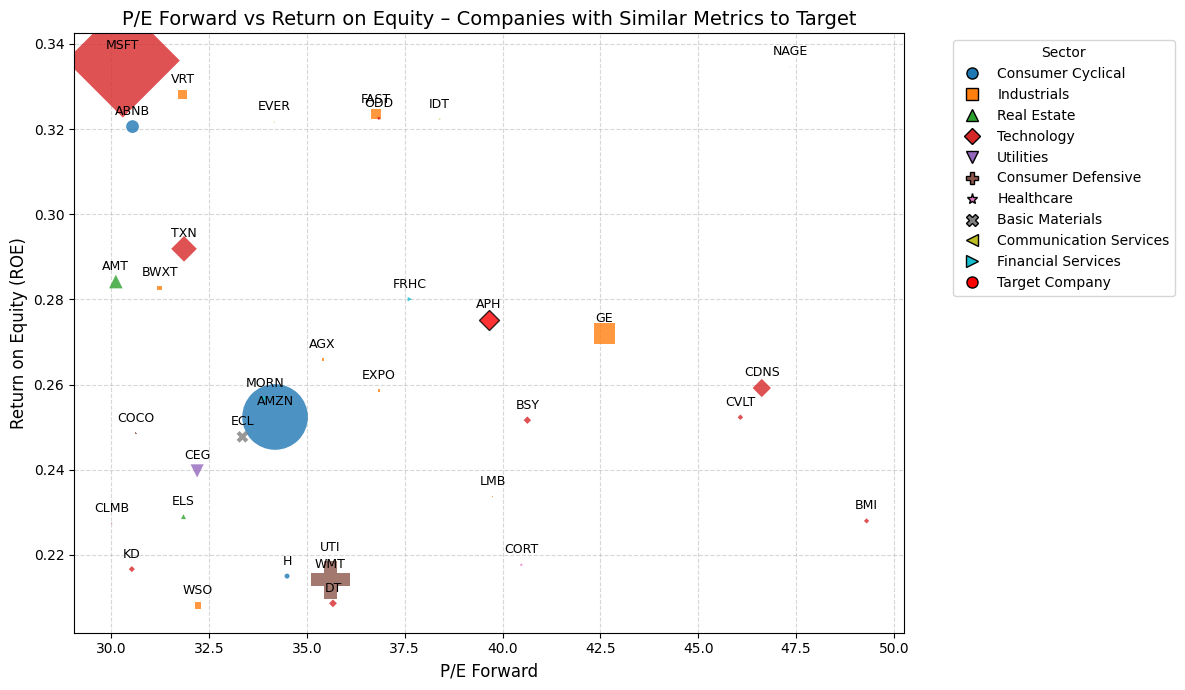

In [41]:

metric_x = "pe_forward"
metric_y = "return_on_equity"
scaling_factor = 1e9  
lower_bound = 0.75
upper_bound = 1.25

metric1_val = float(my_company[metric_x].iloc[0])
metric2_val = float(my_company[metric_y].iloc[0])


metric1_low = metric1_val * lower_bound
metric1_high = metric1_val * upper_bound
metric2_low = metric2_val * lower_bound
metric2_high = metric2_val * upper_bound


filtered_df = df_final[
    df_final[metric_x].between(metric1_low, metric1_high) &
    df_final[metric_y].between(metric2_low, metric2_high) &
    df_final["market_cap"].notna() &
    df_final["sector"].notna()
].copy()


if my_company_symbol not in filtered_df["symbol"].values:
    filtered_df = pd.concat([filtered_df, my_company])


unique_sectors = filtered_df["sector"].unique()
palette = plt.get_cmap("tab10")
sector_colors = {sector: palette(i % 10) for i, sector in enumerate(unique_sectors)}
marker_shapes = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>']
sector_shapes = {sector: marker_shapes[i % len(marker_shapes)] for i, sector in enumerate(unique_sectors)}


filtered_df["size"] = filtered_df["market_cap"] / scaling_factor


plt.figure(figsize=(12, 7))
for _, row in filtered_df.iterrows():
    color = "red" if row["symbol"] == my_company_symbol else sector_colors.get(row["sector"], "gray")
    edge = "black" if row["symbol"] == my_company_symbol else "none"
    size = row["size"]
    shape = sector_shapes.get(row["sector"], 'o')

    plt.scatter(row[metric_x], row[metric_y], s=size, color=color, edgecolors=edge,
                alpha=0.8, marker=shape, zorder=2)
    plt.text(row[metric_x], row[metric_y] + 0.002, row["symbol"],
             fontsize=9, ha='center', va='bottom', zorder=3)


plt.title("P/E Forward vs Return on Equity – Companies with Similar Metrics to Target", fontsize=14)
plt.xlabel("P/E Forward", fontsize=12)
plt.ylabel("Return on Equity (ROE)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

legend_handles = [
    mlines.Line2D([], [], marker=sector_shapes[sec], color='w',
                  markerfacecolor=sector_colors[sec], markeredgecolor='black',
                  markersize=8, linestyle='None', label=sec)
    for sec in unique_sectors
]
legend_handles.append(
    mlines.Line2D([], [], marker='o', color='w',
                  markerfacecolor='red', markeredgecolor='black',
                  markersize=8, linestyle='None', label='Target Company')
)
plt.legend(handles=legend_handles, title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The chart shows a scatter plot of companies that have similar values ​​to our target company, **Amphenol Corporation (APH)**, in terms of **Forward P/E** and **Return on Equity (ROE)**. Similar values ​​were selected based on a dynamic range of ±25%, calculated around APH's specific values ​​for these two metrics. This allowed us to isolate a coherent group of comparable peers, facilitating a more focused analysis.

Each dot represents a company and is **colored according to its sector**, helping to visually distinguish industries within the selected sample. Additionally, each sector is not only represented by a different color but also by a **different shape**: circles, squares, triangles, diamonds and other markers indicate different sectors. This dual coding by color and shape improves readability and helps to immediately identify which industry each company belongs.

The **size of the markers** is proportional to the **market capitalization** of each company: the larger the circle (or shape), the more economically significant the company is on the stock market. This enables us to visualize not only the positioning in terms of P/E and ROE, but also the **relative financial weight** of the players. For example, **Microsoft (MSFT)** appears as a very large point, highlighting its dominance in terms of capitalization.

Our **target company, APH**, is clearly visible in **red** with a **black edge**, and is positioned slightly to the right and centered in the plot. This suggests that APH has a **relatively high Forward P/E ratio** and a **slightly above-average ROE** compared to this selected peer group. This positioning could indicate **positive investor expectations** for the company, aligning with the insights drawn from previous profitability analyses.

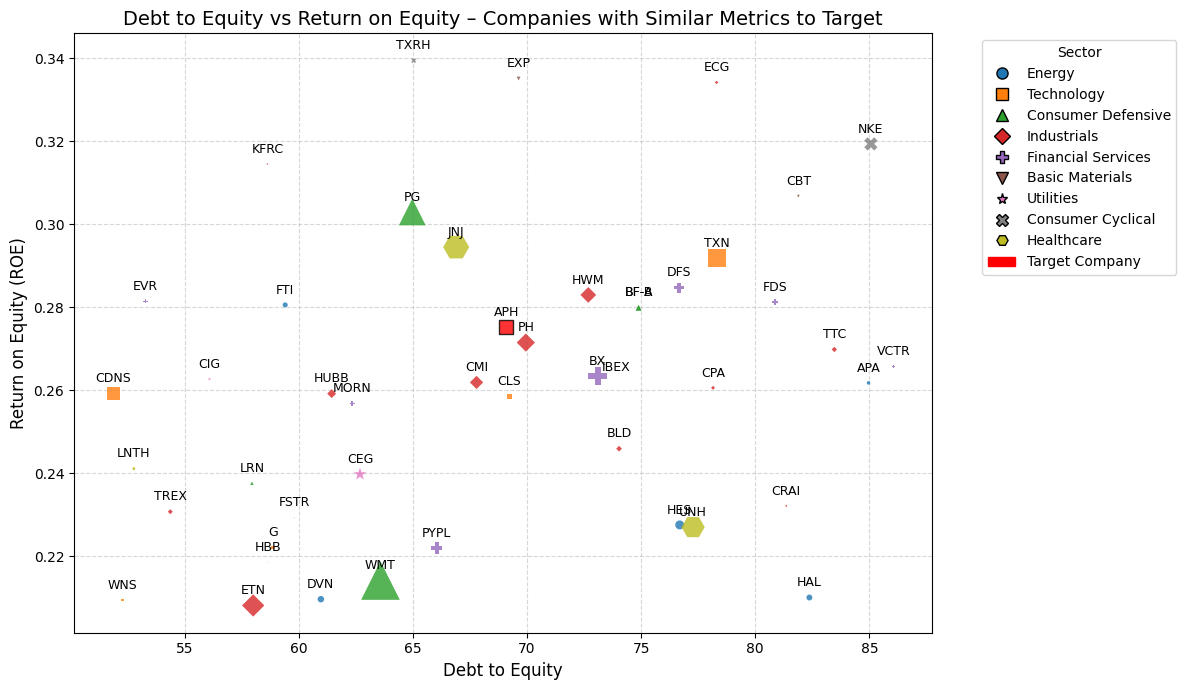

In [45]:

metric_x = "debt_to_equity"
metric_y = "return_on_equity"
scaling_factor = 1e9  
lower_bound = 0.75
upper_bound = 1.25

metric1_val = float(my_company[metric_x].iloc[0])
metric2_val = float(my_company[metric_y].iloc[0])


metric1_low = metric1_val * lower_bound
metric1_high = metric1_val * upper_bound
metric2_low = metric2_val * lower_bound
metric2_high = metric2_val * upper_bound

filtered_df = df_final[
    df_final[metric_x].between(metric1_low, metric1_high) &
    df_final[metric_y].between(metric2_low, metric2_high) &
    df_final["market_cap"].notna() &
    df_final["sector"].notna()
].copy()

if my_company_symbol not in filtered_df["symbol"].values:
    filtered_df = pd.concat([filtered_df, my_company])


unique_sectors = filtered_df["sector"].unique()
palette = plt.get_cmap("tab10")
sector_colors = {sector: palette(i % 10) for i, sector in enumerate(unique_sectors)}
markers = ['o', 's', '^', 'D', 'P', 'v', '*', 'X', 'H', '<']  
sector_markers = {sector: markers[i % len(markers)] for i, sector in enumerate(unique_sectors)}

filtered_df["size"] = filtered_df["market_cap"] / scaling_factor

plt.figure(figsize=(12, 7))
for _, row in filtered_df.iterrows():
    color = "red" if row["symbol"] == my_company_symbol else sector_colors.get(row["sector"], "gray")
    edge = "black" if row["symbol"] == my_company_symbol else "none"
    size = row["size"]
    marker = sector_markers.get(row["sector"], 'o')

    plt.scatter(row[metric_x], row[metric_y], 
                s=size, color=color, edgecolors=edge, 
                marker=marker, alpha=0.8, zorder=2)
    plt.text(row[metric_x], row[metric_y] + 0.002, row["symbol"], 
             fontsize=9, ha='center', va='bottom', zorder=3)


plt.title("Debt to Equity vs Return on Equity – Companies with Similar Metrics to Target", fontsize=14)
plt.xlabel("Debt to Equity", fontsize=12)
plt.ylabel("Return on Equity (ROE)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)


handles = [
    plt.Line2D([], [], marker=sector_markers[s], color='w', 
               markerfacecolor=sector_colors[s], markeredgecolor='black', 
               markersize=8, linestyle='None', label=s) for s in unique_sectors
]
handles.append(mpatches.Patch(color="red", label="Target Company"))
plt.legend(handles=handles, title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The graph represents a comparative analysis between companies similar to our target company in terms of two key metrics:

-Debt to Equity (on the horizontal axis), which measures the level of debt compared to net assets,

-Return on Equity (ROE) (on the vertical axis), which expresses the profitability of equity.

The selection of the companies displayed was also made by applying a dynamic interval of ±25% with respect to the values ​​of our target company (i.e. ×0.75 and ×1.25), as required by the track.

APH's positioning therefore highlights solid and prudent management, which balances profitability and financial sustainability.

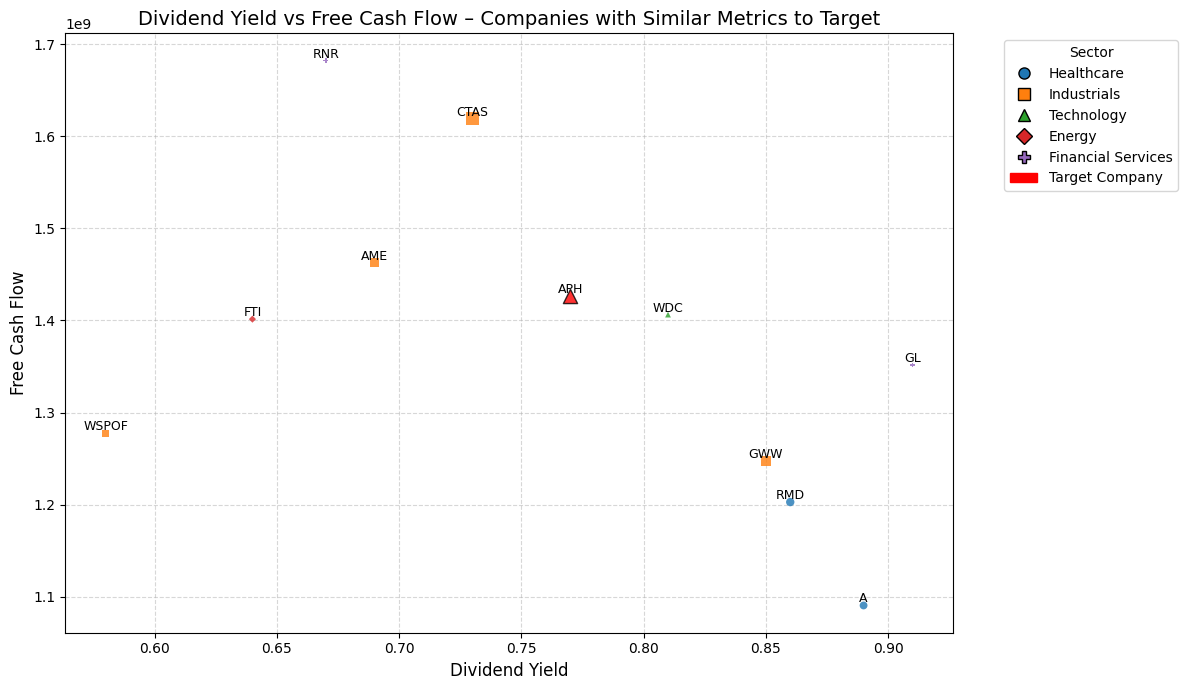

In [46]:

metric_x = "dividend_yield"
metric_y = "free_cashflow"
scaling_factor = 1e9  
lower_bound = 0.75
upper_bound = 1.25


metric1_val = float(my_company[metric_x].iloc[0])
metric2_val = float(my_company[metric_y].iloc[0])


metric1_low = metric1_val * lower_bound
metric1_high = metric1_val * upper_bound
metric2_low = metric2_val * lower_bound
metric2_high = metric2_val * upper_bound


filtered_df = df_final[
    df_final[metric_x].between(metric1_low, metric1_high) &
    df_final[metric_y].between(metric2_low, metric2_high) &
    df_final["market_cap"].notna() &
    df_final["sector"].notna()
].copy()


if my_company_symbol not in filtered_df["symbol"].values:
    filtered_df = pd.concat([filtered_df, my_company])


unique_sectors = filtered_df["sector"].unique()
palette = plt.get_cmap("tab10")
sector_colors = {sector: palette(i % 10) for i, sector in enumerate(unique_sectors)}
markers = ['o', 's', '^', 'D', 'P', 'v', '*', 'X', 'H', '<']
sector_markers = {sector: markers[i % len(markers)] for i, sector in enumerate(unique_sectors)}


filtered_df["size"] = filtered_df["market_cap"] / scaling_factor


plt.figure(figsize=(12, 7))
for _, row in filtered_df.iterrows():
    color = "red" if row["symbol"] == my_company_symbol else sector_colors.get(row["sector"], "gray")
    edge = "black" if row["symbol"] == my_company_symbol else "none"
    size = row["size"]
    marker = sector_markers.get(row["sector"], 'o')

    plt.scatter(row[metric_x], row[metric_y], s=size, color=color, edgecolors=edge, marker=marker, alpha=0.8, zorder=2)
    plt.text(row[metric_x], row[metric_y] + 0.002, row["symbol"], fontsize=9, ha='center', va='bottom', zorder=3)


plt.title("Dividend Yield vs Free Cash Flow – Companies with Similar Metrics to Target", fontsize=14)
plt.xlabel("Dividend Yield", fontsize=12)
plt.ylabel("Free Cash Flow", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)


handles = [
    mlines.Line2D([], [], marker=sector_markers[sec], color='w',
                  markerfacecolor=sector_colors[sec], markeredgecolor='black',
                  markersize=8, linestyle='None', label=sec)
    for sec in unique_sectors
]
handles.append(mpatches.Patch(color="red", label="Target Company"))
plt.legend(handles=handles, title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


APH's position, in the center of the chart, suggests a balance between dividends paid to shareholders and the ability to generate cash. Its dividend yield is moderate (around 0.75), while free cash flow is solid (over 1.4 billion), indicating a company that distributes dividends sustainably, without compromising operating liquidity.

Companies such as CTAS and RNR have slightly higher free cash flows, while GL and GWW stand out for higher dividend yields. However, many of these companies belong to different sectors, such as Industrials, Financial Services or Healthcare, highlighted by different colors in the chart.

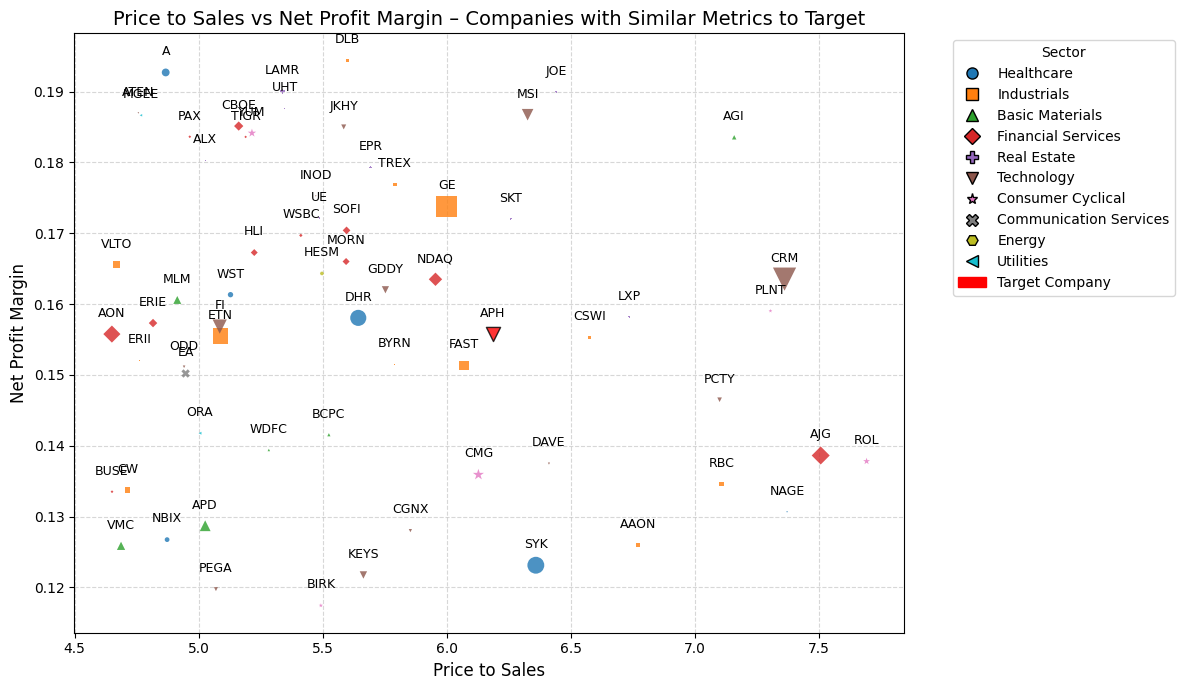

In [47]:

metric_x = "price_to_sales"
metric_y = "net_profit_margin"
scaling_factor = 1e9  
lower_bound = 0.75
upper_bound = 1.25


metric1_val = float(my_company[metric_x].iloc[0])
metric2_val = float(my_company[metric_y].iloc[0])


metric1_low = metric1_val * lower_bound
metric1_high = metric1_val * upper_bound
metric2_low = metric2_val * lower_bound
metric2_high = metric2_val * upper_bound


filtered_df = df_final[
    df_final[metric_x].between(metric1_low, metric1_high) &
    df_final[metric_y].between(metric2_low, metric2_high) &
    df_final["market_cap"].notna() &
    df_final["sector"].notna()
].copy()


if my_company_symbol not in filtered_df["symbol"].values:
    filtered_df = pd.concat([filtered_df, my_company])


unique_sectors = filtered_df["sector"].unique()
palette = plt.get_cmap("tab10")
sector_colors = {sector: palette(i % 10) for i, sector in enumerate(unique_sectors)}
markers = ['o', 's', '^', 'D', 'P', 'v', '*', 'X', 'H', '<']
sector_markers = {sector: markers[i % len(markers)] for i, sector in enumerate(unique_sectors)}


filtered_df["size"] = filtered_df["market_cap"] / scaling_factor


plt.figure(figsize=(12, 7))
for _, row in filtered_df.iterrows():
    color = "red" if row["symbol"] == my_company_symbol else sector_colors.get(row["sector"], "gray")
    edge = "black" if row["symbol"] == my_company_symbol else "none"
    size = row["size"]
    marker = sector_markers.get(row["sector"], 'o')
    
    plt.scatter(row[metric_x], row[metric_y], s=size, color=color, edgecolors=edge, marker=marker, alpha=0.8, zorder=2)
    plt.text(row[metric_x], row[metric_y] + 0.002, row["symbol"], fontsize=9, ha='center', va='bottom', zorder=3)


plt.title("Price to Sales vs Net Profit Margin – Companies with Similar Metrics to Target", fontsize=14)
plt.xlabel("Price to Sales", fontsize=12)
plt.ylabel("Net Profit Margin", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)


handles = [
    mlines.Line2D([], [], marker=sector_markers[sec], color='w',
                  markerfacecolor=sector_colors[sec], markeredgecolor='black',
                  markersize=8, linestyle='None', label=sec)
    for sec in unique_sectors
]
handles.append(mpatches.Patch(color="red", label="Target Company"))
plt.legend(handles=handles, title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Amphenol shows a P/S of around 6.1, a moderately high value that indicates a rather high market valuation compared to revenues. In parallel, the net profit margin stands at around 16%, suggesting good efficiency in generating profits.

Comparing APH with other companies in the chart:

CRM (Salesforce) and PLNT have an even higher P/S, but with comparable or slightly lower margins.

Companies like JOE or LAMR, on the other hand, show higher net margins but less aggressive market prices.